In [1]:
%load_ext autoreload
%autoreload 2

import torch
from torch import nn

import train
import TorchRandomSeed
import modelClass
import dataloader
from torch.utils.data import SubsetRandomSampler

seed =1
seedObject = TorchRandomSeed.TorchRandomSeed(seed=1) 

with seedObject:
    droplist = []#["BloodPressure", "Pregnancies", "Age", "SkinThickness"]
    num_epochs =4
    batch_size = 32
    test_size = 0.2 # is going to be split again in eval and test
    device = "cuda:0" if torch.cuda.is_available() else "cpu"
    #dirPath = "/home/rosario/explainable/Bachelor/"# root
    dirPath= "./" 

    modelsDirPath = dirPath+ "Models"

    print("calculating on: " +str(device))
    lr =0.1 # 0.001 slowed learningrate

    # load data
  
    trainloader ,random_indices_train, testloader,random_indices_test,X_train , X_test,  y_train , y_test, inputFeatures, outputFeatures, datasetName, featureNames, datasetType= dataloader.load_kaggle_diabetes_dataset(batch_size=batch_size)
    #trainloader ,random_indices_train, testloader,random_indices_test,X_train , X_test,  y_train , y_test, inputFeatures, outputFeatures, datasetName, featureNames= dataloader.BreastCancerUCI(batch_size= batch_size, droplist=droplist, test_size=test_size)
    #trainloader ,random_indices_train, testloader,random_indices_test,X_train , X_test,  y_train , y_test, inputFeatures, outputFeatures, datasetName, featureNames= dataloader.dryBeanUCI(batch_size=batch_size , droplist= droplist)
    
    #model = modelClass.Net(inputFeatures= inputFeatures, out_features=outputFeatures)
    model= modelClass.BinaryClassification2HL64N(inputFeatures= inputFeatures, outputFeatures= outputFeatures)
    modelName = model.modelName
    
    #print(random_indices_test)

    #for i,c in testloader:
    #    print(i[0])
    #    print(X_test[random_indices_test[0]])
    #    break
    
    # Backward Propergation - loss and optimizer
    loss_function = nn.CrossEntropyLoss()
    #optimizer = torch.optim.SGD(model.parameters(),lr=lr)
    optimizer = torch.optim.Adam(model.parameters())
    #grads = train.train(trainloader, model, num_epochs, device, y_train,loss_function, optimizer)    
    grads =  train.train(trainloader,random_indices_train, testloader,random_indices_test, model, num_epochs, device, y_train, y_test, loss_function, optimizer)
 
    #train.train(trainloader,random_indices_train, testloader,random_indices_test, model, num_epochs, device, y_train, y_test, loss_function, optimizer)
    print(dirPath)

    import evalModel
    import plotResults
    from matplotlib import pyplot as plt
    print("evaluating ...")
    loaderList = [testloader]
    nameList = ["test"]
    yList = [y_test]
    evalModel.doALLeval(model, modelsDirPath, dirPath, loaderList, device,optimizer, loss_function, num_epochs, nameList, yList, inputFeatures, random_indices_test)
    print(dirPath)
    print(modelsDirPath)

calculating on: cuda:0
tensor([[-0.9289,  1.4697,  0.3169,  ..., -0.5756, -1.0470, -0.1107],
        [-0.6037,  2.2679,  0.5258,  ..., -0.1232, -0.6194, -0.2017],
        [-0.6989,  2.0938,  0.7652,  ..., -0.1837, -0.8559, -0.1295],
        ...,
        [-0.5848,  2.2127,  0.5031,  ...,  0.0353, -0.7070, -0.0409],
        [-0.6014,  1.8933,  0.8650,  ..., -0.6966, -0.6844,  0.6174],
        [-0.4838,  2.2531, -0.6111,  ...,  0.2800, -0.5916,  0.3755]])
train:shuffel = False
eval:shuffel = False
Epoch: 0
      Training_acc: 0.6530944625407166
-------------------

Epoch: 1
      Training_acc: 0.6530944625407166
-------------------

Epoch: 2
      Training_acc: 0.6530944625407166
-------------------

Epoch: 3
      Training_acc: 0.6530944625407166
-------------------

NOTE: THESE SAVED MODELS ARE BEEING OVERWRITTEN ON NEXT RUN
./
evaluating ...
jo


0it [00:00, ?it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(1, 26, 8)


1it [00:00,  5.40it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(2, 26, 8)


2it [00:00,  5.60it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(3, 26, 8)


3it [00:00,  5.39it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(4, 26, 8)


4it [00:00,  5.40it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(5, 26, 8)


5it [00:00,  5.29it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(6, 26, 8)


6it [00:01,  5.30it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(7, 26, 8)


7it [00:01,  5.06it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(8, 26, 8)


8it [00:01,  4.89it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(9, 26, 8)


9it [00:01,  4.98it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(10, 26, 8)


10it [00:01,  5.01it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(11, 26, 8)


11it [00:02,  5.04it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(12, 26, 8)


12it [00:02,  5.12it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(13, 26, 8)


13it [00:02,  5.17it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(14, 26, 8)


14it [00:02,  5.26it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(15, 26, 8)


15it [00:02,  5.12it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(16, 26, 8)


16it [00:03,  5.22it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(17, 26, 8)


17it [00:03,  5.29it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(18, 26, 8)


18it [00:03,  5.31it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(19, 26, 8)


19it [00:03,  5.36it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(20, 26, 8)


20it [00:03,  5.38it/s]

Progess: 23.75%
test acc: 64.29%
test Loss: 0.67
-------------------
not NLP
not NLP
not NLP
not NLP
not NLP
(21, 26, 8)


21it [00:04,  5.40it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(22, 26, 8)


22it [00:04,  5.24it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(23, 26, 8)


23it [00:04,  5.12it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(24, 26, 8)


24it [00:04,  5.17it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(25, 26, 8)


25it [00:04,  5.05it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(26, 26, 8)


26it [00:05,  5.06it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(27, 26, 8)


27it [00:05,  4.94it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(28, 26, 8)


28it [00:05,  5.05it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(29, 26, 8)


29it [00:05,  5.06it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(30, 26, 8)


30it [00:05,  5.00it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(31, 26, 8)


31it [00:06,  5.01it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(32, 26, 8)


32it [00:06,  4.85it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(33, 26, 8)


33it [00:06,  5.03it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(34, 26, 8)


34it [00:06,  5.03it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(35, 26, 8)


35it [00:06,  5.08it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(36, 26, 8)


36it [00:07,  5.15it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(37, 26, 8)


37it [00:07,  5.18it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(38, 26, 8)


38it [00:07,  5.18it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(39, 26, 8)


39it [00:07,  5.22it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(40, 26, 8)


40it [00:07,  5.17it/s]

Progess: 48.75%
test acc: 64.29%
test Loss: 0.66
-------------------
not NLP
not NLP
not NLP
not NLP
not NLP
(41, 26, 8)


41it [00:07,  5.07it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(42, 26, 8)


42it [00:08,  4.91it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(43, 26, 8)


43it [00:08,  4.73it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(44, 26, 8)


44it [00:08,  4.77it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(45, 26, 8)


45it [00:08,  4.92it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(46, 26, 8)


46it [00:09,  4.97it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(47, 26, 8)


47it [00:09,  4.91it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(48, 26, 8)


48it [00:09,  4.84it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(49, 26, 8)


49it [00:09,  4.76it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(50, 26, 8)


50it [00:09,  4.69it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(51, 26, 8)


51it [00:10,  4.67it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(52, 26, 8)


52it [00:10,  4.71it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(53, 26, 8)


53it [00:10,  4.66it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(54, 26, 8)


54it [00:10,  4.71it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(55, 26, 8)


55it [00:10,  4.80it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(56, 26, 8)


56it [00:11,  4.91it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(57, 26, 8)


57it [00:11,  5.02it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(58, 26, 8)


58it [00:11,  5.06it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(59, 26, 8)


59it [00:11,  5.06it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(60, 26, 8)


60it [00:11,  5.15it/s]

Progess: 73.75%
test acc: 64.29%
test Loss: 0.66
-------------------
not NLP
not NLP
not NLP
not NLP
not NLP
(61, 26, 8)


61it [00:12,  5.20it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(62, 26, 8)


62it [00:12,  5.19it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(63, 26, 8)


63it [00:12,  5.22it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(64, 26, 8)


64it [00:12,  5.25it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(65, 26, 8)


65it [00:12,  5.24it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(66, 26, 8)


66it [00:13,  5.25it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(67, 26, 8)


67it [00:13,  5.24it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(68, 26, 8)


68it [00:13,  5.23it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(69, 26, 8)


69it [00:13,  5.18it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(70, 26, 8)


70it [00:13,  5.27it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(71, 26, 8)


71it [00:13,  5.30it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(72, 26, 8)


72it [00:14,  5.34it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(73, 26, 8)


73it [00:14,  4.94it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(74, 26, 8)


74it [00:14,  5.02it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(75, 26, 8)


75it [00:14,  5.13it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(76, 26, 8)


76it [00:14,  5.11it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(77, 26, 8)


77it [00:15,  4.95it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(78, 26, 8)


78it [00:15,  4.88it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(79, 26, 8)


79it [00:15,  4.75it/s]

not NLP
not NLP
not NLP
not NLP
not NLP
(80, 26, 8)


80it [00:15,  5.05it/s]

Progess: 98.75%
test acc: 64.29%
test Loss: 0.66
-------------------
(4, 26, 8)
./
./Models


plotting...
cosine_similarity


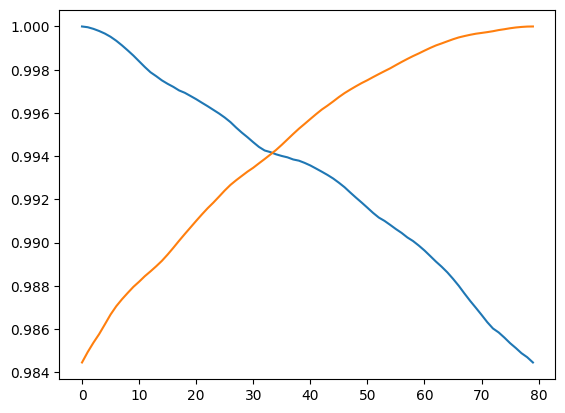

percentageWeightsSignDifference3


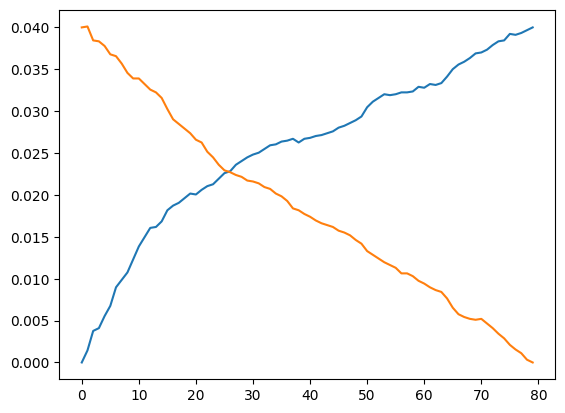

weightsMagnitude3


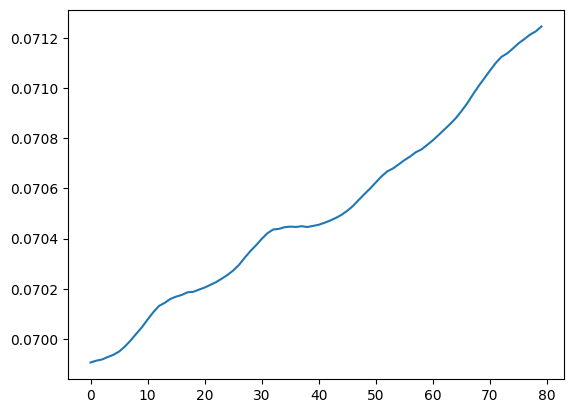

L2Distance3


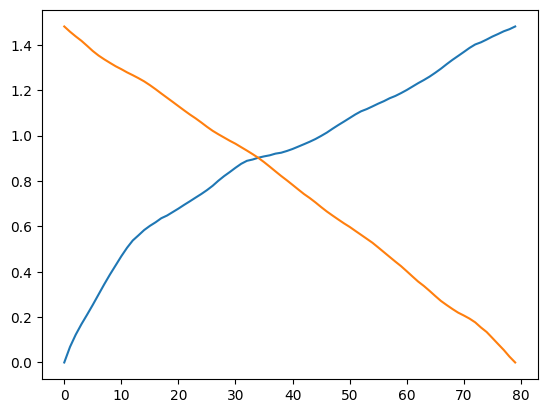

weightTrace3


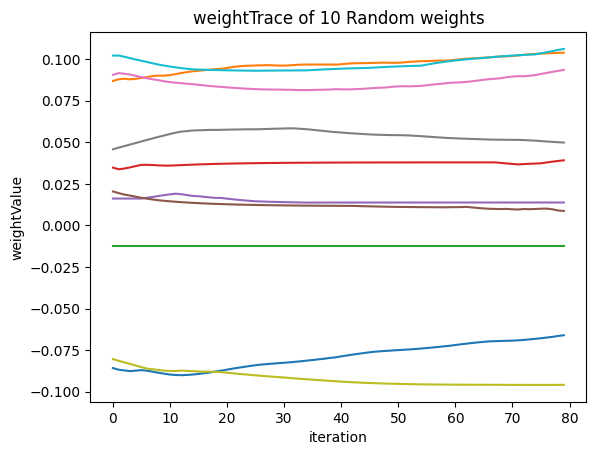

averageGradientMagnitude3
plotting: GM GradientMagnitude averaged over features


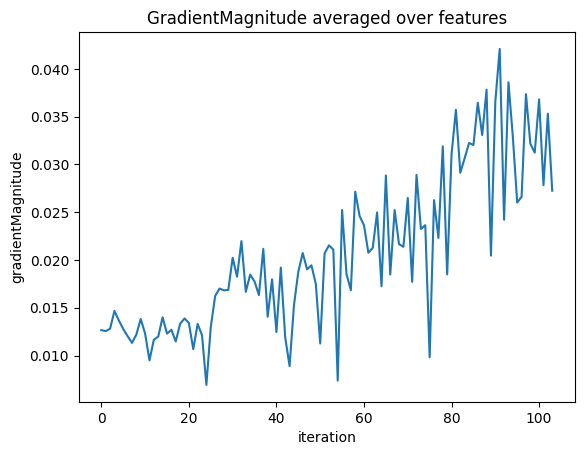

GradientMagnitudePerFeature3
plotting: GM GradientMagnitude PerFeature


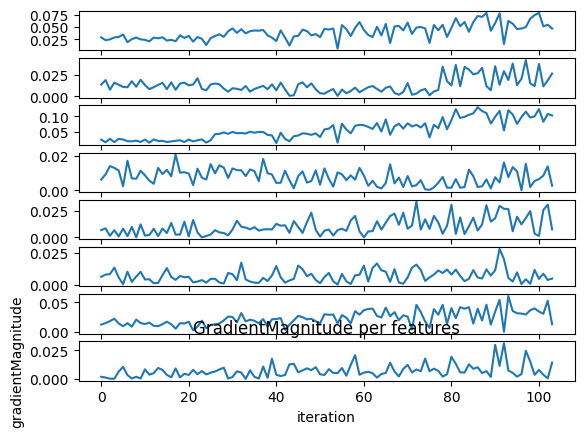

In [2]:
dataPath= dirPath+ "Results/Trainingresults/"
print("plotting...")
import utils 
import numpy as np

#unpackedGradiends = utils.unpackingGradients(inputFeatures, grads)
#averagedGradientMagnitude = np.average(np.absolute(unpackedGradiends), axis=0) 
#gradientMagnitudePerFeature = np.absolute(unpackedGradiends)
#utils.appendToNPZ(dirPath+ "data.npz", "test" + "GradientsPerFeature", unpackedGradiends)
#utils.appendToNPZ(dirPath+ "data.npz", "test" + "GradientMagnitudePerFeature", gradientMagnitudePerFeature)
#utils.appendToNPZ(dirPath+ "data.npz", "test" + "AveragedGradientMagnitude", averagedGradientMagnitude)
#plotResults.plotCosineSimilarity(dirPath, "cosine_simialarity", set="train")
#plotResults.plotCosineSimilarity(dirPath, "cosine_simialarity", set="eval")
print("cosine_similarity")
plotResults.plotCosineSimilarity(dataPath, "cosine_simialarity", set="test")
plt.show()
#plotResults.plotWeightSignDifferences(dirPath, "percentageWeightsSignDifference1" , "train")
#plotResults.plotWeightSignDifferences(dirPath, "percentageWeightsSignDifference2" , "eval")
print("percentageWeightsSignDifference3")
plotResults.plotWeightSignDifferences(dataPath, "percentageWeightsSignDifference3" , "test")
plt.show()
print("weightsMagnitude3")
#plotResults.plotWeightMagnitude(dirPath, "weightsMagnitude1","train")
#plotResults.plotWeightMagnitude(dirPath, "weightsMagnitude2","eval")
plotResults.plotWeightMagnitude(dataPath, "weightsMagnitude3","test")
plt.show()
print("L2Distance3")
#plotResults.plotL2Distance(dirPath, "L2Distance1","train")
#plotResults.plotL2Distance(dirPath, "L2Distance2","eval")
plotResults.plotL2Distance(dataPath, "L2Distance3","test")
plt.show()
print("weightTrace3")
#plotResults.plotWeightTrace(dirPath, "weightTrace1","train")
#plotResults.plotWeightTrace(dirPath, "weightTrace2","eval")
plotResults.plotWeightTrace(dataPath, "weightTrace3","test")    
plt.show()
#plotResults.plotGradientsPerFeature(dirPath,"gradientsPerFeature1" ,False)
#plotResults.plotGradientsPerFeature(dirPath,"gradientsPerFeature2" ,True )
#plt.show()
print("averageGradientMagnitude3")
#plotResults.plotGradientMagnitude(dirPath, "averageGradientMagnitude1","train", perFeature=False)
#plotResults.plotGradientMagnitude(dirPath, "averageGradientMagnitude2","eval", perFeature=False)
plotResults.plotGradientMagnitude(dataPath, "averageGradientMagnitude3","test", perFeature=False)
plt.show()
print("GradientMagnitudePerFeature3")
#plotResults.plotGradientMagnitude(dirPath, "GradientMagnitudePerFeature1","train", perFeature=True)
#plotResults.plotGradientMagnitude(dirPath, "GradientMagnitudePerFeature2","eval", perFeature=True)
plotResults.plotGradientMagnitude(dataPath, "GradientMagnitudePerFeature3","test", perFeature=True)
plt.show()
#plotResults.plotLoss_Acc(dirPath,"loss_acc1", False)
#plotResults.plotLoss_Acc(dirPath,"loss_acc2",True)
#plt.show()
#print("confusionMatrix3")
#plotResults.plotConfusionMatrix(dirPath, "confusionMatrix1", set="train")
#plotResults.plotConfusionMatrix(dirPath, "confusionMatrix2", set="eval")
#plotResults.plotConfusionMatrix(dataPath, "confusionMatrix3", set="test")
#plt.show()

y_test
inputFeatures
testLossPerEpochList
testLossPerIterationList
testAccPerEpochList
testAccPerIterationList
testPredictionList
testCosine_similarity_toInitialList
testCosine_similarity_toFinalList
testPercentageWeightSignDifferences_toInitialList
testPercentageWeightSignDifferences_toFinalList
testAbsoluteIterationWeightsList
testL2Dist_toInitialList
testL2Dist_toFinalList
testRandom10WeightsList
testGradientsPerSamplePerFeature
testGradientsPerFeature
testGradientMagnitudePerFeature
testAveragedGradientMagnitude
testGradientsPerSamplePerFeature_iteration
testGradientsPerFeature_iteration
testGradientMagnitudePerFeature_iteration
testAveragedGradientMagnitude_iteration


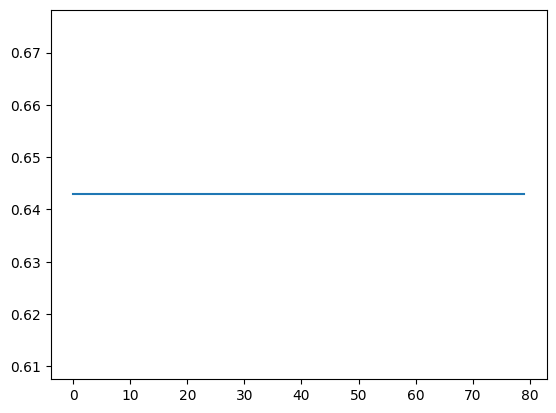

In [3]:
data = utils.loadData(dataPath+ "data.npz")

for i in data:
    print(i)

np.shape(data["testGradientsPerSamplePerFeature_iteration"])

plt.plot(data["testAccPerIterationList"])
plt.show()

In [15]:
import cega_utils

#data 
trainedModelPrediction_Test = model.predict(X_test.to("cuda:0"))
                                    # data   
#print(trainedModelPrediction_Test)
print(datasetType)
cega_utils.calculateAndSaveOHE_Rules(X_test, featureNames,trainedModelPrediction_Test, data["testGradientsPerSamplePerFeature_iteration"], debug= False, datasetType=datasetType) #OHEresults


numerical
lolo
aaasa
{'Pregnancies': 0      (-0.972, -0.778]
1      (-0.778, -0.583]
2      (-0.778, -0.583]
3      (-0.972, -0.778]
4      (-0.972, -0.778]
             ...       
149    (-0.972, -0.778]
150    (-1.167, -0.972]
151    (-0.778, -0.583]
152    (-0.778, -0.583]
153    (-0.583, -0.388]
Name: Pregnancies, Length: 154, dtype: category
Categories (5, interval[float64, right]): [(-1.363, -1.167] < (-1.167, -0.972] < (-0.972, -0.778] < (-0.778, -0.583] < (-0.583, -0.388]], 'Glucose': 0      (1.064, 1.731]
1      (1.731, 2.399]
2      (1.731, 2.399]
3      (0.396, 1.064]
4      (0.396, 1.064]
            ...      
149    (1.731, 2.399]
150    (1.064, 1.731]
151    (1.731, 2.399]
152    (1.731, 2.399]
153    (1.731, 2.399]
Name: Glucose, Length: 154, dtype: category
Categories (5, interval[float64, right]): [(-0.942, -0.271] < (-0.271, 0.396] < (0.396, 1.064] < (1.064, 1.731] < (1.731, 2.399]], 'BloodPressure': 0       (-0.111, 0.403]
1        (0.403, 0.916]
2        (0.403, 0.9

  2%|▎         | 2/80 [00:00<00:05, 15.04it/s]

0
print(instance_features)
{'Pregnancies': -0.928855836391449, 'Glucose': 1.469709038734436, 'BloodPressure': 0.31691035628318787, 'SkinThickness': -0.5755788683891296, 'Insulin': 1.4511154890060425, 'BMI': -0.5755788683891296, 'DiabetesPedigreeFunction': -1.0469805002212524, 'Age': -0.11074072122573853}
[-0.928855836391449, 1.469709038734436, 0.31691035628318787, -0.5755788683891296, 1.4511154890060425, -0.5755788683891296, -1.0469805002212524, -0.11074072122573853]
print(instance_features)
{'Pregnancies': -0.6037174463272095, 'Glucose': 2.2679481506347656, 'BloodPressure': 0.5258044004440308, 'SkinThickness': -0.6228618621826172, 'Insulin': -0.6228618621826172, 'BMI': -0.12319203466176987, 'DiabetesPedigreeFunction': -0.6194350123405457, 'Age': -0.20168423652648926}
[-0.6037174463272095, 2.2679481506347656, 0.5258044004440308, -0.6228618621826172, -0.6228618621826172, -0.12319203466176987, -0.6194350123405457, -0.20168423652648926]
print(instance_features)
{'Pregnancies': -0.69885301

  8%|▊         | 6/80 [00:00<00:04, 16.15it/s]

print(instance_features)
{'Pregnancies': -0.9107191562652588, 'Glucose': 0.9202880859375, 'BloodPressure': 0.3152596354484558, 'SkinThickness': -0.4649086892604828, 'Insulin': 1.9392834901809692, 'BMI': -0.35186389088630676, 'DiabetesPedigreeFunction': -0.9187437295913696, 'Age': -0.5285958647727966}
[-0.9107191562652588, 0.9202880859375, 0.3152596354484558, -0.4649086892604828, 1.9392834901809692, -0.35186389088630676, -0.9187437295913696, -0.5285958647727966]
print(instance_features)
{'Pregnancies': -0.8272981643676758, 'Glucose': 2.0570154190063477, 'BloodPressure': 0.772405207157135, 'SkinThickness': -0.1728740632534027, 'Insulin': -0.8272981643676758, 'BMI': 0.1131334900856018, 'DiabetesPedigreeFunction': -0.8210206031799316, 'Age': -0.2940637171268463}
[-0.8272981643676758, 2.0570154190063477, 0.772405207157135, -0.1728740632534027, -0.8272981643676758, 0.1131334900856018, -0.8210206031799316, -0.2940637171268463]
print(instance_features)
{'Pregnancies': -0.6505948901176453, 'Glu

 10%|█         | 8/80 [00:00<00:04, 16.24it/s]

print(instance_features)
{'Pregnancies': -0.8900466561317444, 'Glucose': 2.1483752727508545, 'BloodPressure': 0.42660287022590637, 'SkinThickness': 0.17340104281902313, 'Insulin': -0.6537249684333801, 'BMI': 0.1126326322555542, 'DiabetesPedigreeFunction': -0.8491967916488647, 'Age': -0.46804362535476685}
[-0.8900466561317444, 2.1483752727508545, 0.42660287022590637, 0.17340104281902313, -0.6537249684333801, 0.1126326322555542, -0.8491967916488647, -0.46804362535476685]
print(instance_features)
{'Pregnancies': -0.89175945520401, 'Glucose': 1.4215595722198486, 'BloodPressure': 0.255792498588562, 'SkinThickness': -0.6185328364372253, 'Insulin': 1.5308502912521362, 'BMI': -0.43456020951271057, 'DiabetesPedigreeFunction': -1.0819798707962036, 'Age': -0.18137015402317047}
[-0.89175945520401, 1.4215595722198486, 0.255792498588562, -0.6185328364372253, 1.5308502912521362, -0.43456020951271057, -1.0819798707962036, -0.18137015402317047]
print(instance_features)
{'Pregnancies': -0.87369138002395

 15%|█▌        | 12/80 [00:00<00:04, 15.20it/s]

print(instance_features)
{'Pregnancies': -0.8019004464149475, 'Glucose': 1.6628313064575195, 'BloodPressure': 1.3239306211471558, 'SkinThickness': -0.2781449854373932, 'Insulin': -0.9559462070465088, 'BMI': -0.06248094514012337, 'DiabetesPedigreeFunction': -0.9182358384132385, 'Age': 0.029946494847536087}
[-0.8019004464149475, 1.6628313064575195, 1.3239306211471558, -0.2781449854373932, -0.9559462070465088, -0.06248094514012337, -0.9182358384132385, 0.029946494847536087]
print(instance_features)
{'Pregnancies': -0.8436493277549744, 'Glucose': 1.8956775665283203, 'BloodPressure': 0.18828889727592468, 'SkinThickness': -0.3933490216732025, 'Insulin': 0.9763144850730896, 'BMI': -0.3952252268791199, 'DiabetesPedigreeFunction': -1.1472830772399902, 'Age': -0.28077393770217896}
[-0.8436493277549744, 1.8956775665283203, 0.18828889727592468, -0.3933490216732025, 0.9763144850730896, -0.3952252268791199, -1.1472830772399902, -0.28077393770217896]
print(instance_features)
{'Pregnancies': -0.673148

 18%|█▊        | 14/80 [00:00<00:04, 15.26it/s]

print(instance_features)
{'Pregnancies': -1.097986102104187, 'Glucose': 1.600168228149414, 'BloodPressure': 0.5351073741912842, 'SkinThickness': -0.4116135239601135, 'Insulin': 1.1504758596420288, 'BMI': -0.3027406632900238, 'DiabetesPedigreeFunction': -1.1091338396072388, 'Age': -0.3642774820327759}
[-1.097986102104187, 1.600168228149414, 0.5351073741912842, -0.4116135239601135, 1.1504758596420288, -0.3027406632900238, -1.1091338396072388, -0.3642774820327759]
print(instance_features)
{'Pregnancies': -0.8616257309913635, 'Glucose': 2.0340020656585693, 'BloodPressure': 0.8853232264518738, 'SkinThickness': -0.3351479768753052, 'Insulin': -0.454802006483078, 'BMI': -0.272927850484848, 'DiabetesPedigreeFunction': -0.9707741737365723, 'Age': -0.024047475308179855}
[-0.8616257309913635, 2.0340020656585693, 0.8853232264518738, -0.3351479768753052, -0.454802006483078, -0.272927850484848, -0.9707741737365723, -0.024047475308179855]
print(instance_features)
{'Pregnancies': -0.477333664894104, '

 22%|██▎       | 18/80 [00:01<00:03, 15.86it/s]

print(instance_features)
{'Pregnancies': -1.1053599119186401, 'Glucose': 1.8052208423614502, 'BloodPressure': 0.9353921413421631, 'SkinThickness': -0.3358960449695587, 'Insulin': 0.333202987909317, 'BMI': -0.13851183652877808, 'DiabetesPedigreeFunction': -1.1246968507766724, 'Age': -0.36935099959373474}
[-1.1053599119186401, 1.8052208423614502, 0.9353921413421631, -0.3358960449695587, 0.333202987909317, -0.13851183652877808, -1.1246968507766724, -0.36935099959373474]
print(instance_features)
{'Pregnancies': -0.6753479242324829, 'Glucose': 1.9539620876312256, 'BloodPressure': 0.9278898239135742, 'SkinThickness': -0.7822304368019104, 'Insulin': -0.7822304368019104, 'BMI': -0.04260345548391342, 'DiabetesPedigreeFunction': -0.7791522145271301, 'Age': 0.1797122210264206}
[-0.6753479242324829, 1.9539620876312256, 0.9278898239135742, -0.7822304368019104, -0.7822304368019104, -0.04260345548391342, -0.7791522145271301, 0.1797122210264206]
16
print(instance_features)
{'Pregnancies': -0.928855836

 28%|██▊       | 22/80 [00:01<00:03, 16.15it/s]

print(instance_features)
{'Pregnancies': -0.9504030346870422, 'Glucose': 1.7699122428894043, 'BloodPressure': 1.0048235654830933, 'SkinThickness': 0.15472504496574402, 'Insulin': -0.9787396192550659, 'BMI': 0.10088542103767395, 'DiabetesPedigreeFunction': -0.972562313079834, 'Age': -0.12864112854003906}
[-0.9504030346870422, 1.7699122428894043, 1.0048235654830933, 0.15472504496574402, -0.9787396192550659, 0.10088542103767395, -0.972562313079834, -0.12864112854003906]
print(instance_features)
{'Pregnancies': -1.0369843244552612, 'Glucose': 1.0585734844207764, 'BloodPressure': 0.24030807614326477, 'SkinThickness': -0.21871887147426605, 'Insulin': 1.7970082759857178, 'BMI': -0.2087400108575821, 'DiabetesPedigreeFunction': -1.0335315465927124, 'Age': -0.5979150533676147}
[-1.0369843244552612, 1.0585734844207764, 0.24030807614326477, -0.21871887147426605, 1.7970082759857178, -0.2087400108575821, -1.0335315465927124, -0.5979150533676147]
print(instance_features)
{'Pregnancies': -0.7558092474

 30%|███       | 24/80 [00:01<00:03, 16.10it/s]

print(instance_features)
{'Pregnancies': -0.5784093141555786, 'Glucose': 2.098081111907959, 'BloodPressure': 0.776992917060852, 'SkinThickness': -0.7328222393989563, 'Insulin': -0.7328222393989563, 'BMI': -0.2112497240304947, 'DiabetesPedigreeFunction': -0.7276408076286316, 'Age': 0.10787029564380646}
[-0.5784093141555786, 2.098081111907959, 0.776992917060852, -0.7328222393989563, -0.7328222393989563, -0.2112497240304947, -0.7276408076286316, 0.10787029564380646]
print(instance_features)
{'Pregnancies': -1.097986102104187, 'Glucose': 1.600168228149414, 'BloodPressure': 0.5351073741912842, 'SkinThickness': -0.4116135239601135, 'Insulin': 1.1504758596420288, 'BMI': -0.3027406632900238, 'DiabetesPedigreeFunction': -1.1091338396072388, 'Age': -0.3642774820327759}
[-1.097986102104187, 1.600168228149414, 0.5351073741912842, -0.4116135239601135, 1.1504758596420288, -0.3027406632900238, -1.1091338396072388, -0.3642774820327759]
print(instance_features)
{'Pregnancies': -0.8616257309913635, 'Glu

 35%|███▌      | 28/80 [00:01<00:03, 15.05it/s]

print(instance_features)
{'Pregnancies': -0.6731482148170471, 'Glucose': 1.9717707633972168, 'BloodPressure': 0.8980907797813416, 'SkinThickness': -0.22796383500099182, 'Insulin': -0.9350214004516602, 'BMI': -0.21487018465995789, 'DiabetesPedigreeFunction': -0.9313290119171143, 'Age': 0.11247128248214722}
[-0.6731482148170471, 1.9717707633972168, 0.8980907797813416, -0.22796383500099182, -0.9350214004516602, -0.21487018465995789, -0.9313290119171143, 0.11247128248214722]
print(instance_features)
{'Pregnancies': -1.1053599119186401, 'Glucose': 1.8052208423614502, 'BloodPressure': 0.9353921413421631, 'SkinThickness': -0.3358960449695587, 'Insulin': 0.333202987909317, 'BMI': -0.13851183652877808, 'DiabetesPedigreeFunction': -1.1246968507766724, 'Age': -0.36935099959373474}
[-1.1053599119186401, 1.8052208423614502, 0.9353921413421631, -0.3358960449695587, 0.333202987909317, -0.13851183652877808, -1.1246968507766724, -0.36935099959373474]
print(instance_features)
{'Pregnancies': -0.67534792

 38%|███▊      | 30/80 [00:01<00:03, 15.05it/s]

print(instance_features)
{'Pregnancies': -0.8616257309913635, 'Glucose': 2.0340020656585693, 'BloodPressure': 0.8853232264518738, 'SkinThickness': -0.3351479768753052, 'Insulin': -0.454802006483078, 'BMI': -0.272927850484848, 'DiabetesPedigreeFunction': -0.9707741737365723, 'Age': -0.024047475308179855}
[-0.8616257309913635, 2.0340020656585693, 0.8853232264518738, -0.3351479768753052, -0.454802006483078, -0.272927850484848, -0.9707741737365723, -0.024047475308179855]
print(instance_features)
{'Pregnancies': -0.477333664894104, 'Glucose': 2.365246534347534, 'BloodPressure': -0.5359435677528381, 'SkinThickness': -0.5359435677528381, 'Insulin': -0.5359435677528381, 'BMI': 0.11462634056806564, 'DiabetesPedigreeFunction': -0.5327786207199097, 'Age': 0.1380702704191208}
[-0.477333664894104, 2.365246534347534, -0.5359435677528381, -0.5359435677528381, -0.5359435677528381, 0.11462634056806564, -0.5327786207199097, 0.1380702704191208]
print(instance_features)
{'Pregnancies': -0.661835789680481,

 42%|████▎     | 34/80 [00:02<00:02, 15.50it/s]

print(instance_features)
{'Pregnancies': -0.8436493277549744, 'Glucose': 1.8956775665283203, 'BloodPressure': 0.18828889727592468, 'SkinThickness': -0.3933490216732025, 'Insulin': 0.9763144850730896, 'BMI': -0.3952252268791199, 'DiabetesPedigreeFunction': -1.1472830772399902, 'Age': -0.28077393770217896}
[-0.8436493277549744, 1.8956775665283203, 0.18828889727592468, -0.3933490216732025, 0.9763144850730896, -0.3952252268791199, -1.1472830772399902, -0.28077393770217896]
print(instance_features)
{'Pregnancies': -0.6731482148170471, 'Glucose': 1.9717707633972168, 'BloodPressure': 0.8980907797813416, 'SkinThickness': -0.22796383500099182, 'Insulin': -0.9350214004516602, 'BMI': -0.21487018465995789, 'DiabetesPedigreeFunction': -0.9313290119171143, 'Age': 0.11247128248214722}
[-0.6731482148170471, 1.9717707633972168, 0.8980907797813416, -0.22796383500099182, -0.9350214004516602, -0.21487018465995789, -0.9313290119171143, 0.11247128248214722]
print(instance_features)
{'Pregnancies': -1.105359

 48%|████▊     | 38/80 [00:02<00:02, 15.95it/s]

35
print(instance_features)
{'Pregnancies': -0.928855836391449, 'Glucose': 1.469709038734436, 'BloodPressure': 0.31691035628318787, 'SkinThickness': -0.5755788683891296, 'Insulin': 1.4511154890060425, 'BMI': -0.5755788683891296, 'DiabetesPedigreeFunction': -1.0469805002212524, 'Age': -0.11074072122573853}
[-0.928855836391449, 1.469709038734436, 0.31691035628318787, -0.5755788683891296, 1.4511154890060425, -0.5755788683891296, -1.0469805002212524, -0.11074072122573853]
print(instance_features)
{'Pregnancies': -0.6037174463272095, 'Glucose': 2.2679481506347656, 'BloodPressure': 0.5258044004440308, 'SkinThickness': -0.6228618621826172, 'Insulin': -0.6228618621826172, 'BMI': -0.12319203466176987, 'DiabetesPedigreeFunction': -0.6194350123405457, 'Age': -0.20168423652648926}
[-0.6037174463272095, 2.2679481506347656, 0.5258044004440308, -0.6228618621826172, -0.6228618621826172, -0.12319203466176987, -0.6194350123405457, -0.20168423652648926]
print(instance_features)
{'Pregnancies': -0.6988530

 50%|█████     | 40/80 [00:02<00:02, 15.81it/s]

print(instance_features)
{'Pregnancies': -1.0369843244552612, 'Glucose': 1.0585734844207764, 'BloodPressure': 0.24030807614326477, 'SkinThickness': -0.21871887147426605, 'Insulin': 1.7970082759857178, 'BMI': -0.2087400108575821, 'DiabetesPedigreeFunction': -1.0335315465927124, 'Age': -0.5979150533676147}
[-1.0369843244552612, 1.0585734844207764, 0.24030807614326477, -0.21871887147426605, 1.7970082759857178, -0.2087400108575821, -1.0335315465927124, -0.5979150533676147]
print(instance_features)
{'Pregnancies': -0.7558092474937439, 'Glucose': 1.951029658317566, 'BloodPressure': 0.9724032878875732, 'SkinThickness': -0.04786678031086922, 'Insulin': -0.9015620946884155, 'BMI': -0.23526331782341003, 'DiabetesPedigreeFunction': -0.8934208154678345, 'Age': -0.08951045572757721}
[-0.7558092474937439, 1.951029658317566, 0.9724032878875732, -0.04786678031086922, -0.9015620946884155, -0.23526331782341003, -0.8934208154678345, -0.08951045572757721]
print(instance_features)
{'Pregnancies': -1.116290

 52%|█████▎    | 42/80 [00:02<00:02, 15.03it/s]

print(instance_features)
{'Pregnancies': -0.89175945520401, 'Glucose': 1.4215595722198486, 'BloodPressure': 0.255792498588562, 'SkinThickness': -0.6185328364372253, 'Insulin': 1.5308502912521362, 'BMI': -0.43456020951271057, 'DiabetesPedigreeFunction': -1.0819798707962036, 'Age': -0.18137015402317047}
[-0.89175945520401, 1.4215595722198486, 0.255792498588562, -0.6185328364372253, 1.5308502912521362, -0.43456020951271057, -1.0819798707962036, -0.18137015402317047]
print(instance_features)
{'Pregnancies': -0.8736913800239563, 'Glucose': 1.730299711227417, 'BloodPressure': 0.5386427640914917, 'SkinThickness': -0.36613380908966064, 'Insulin': 1.090335726737976, 'BMI': -0.8736913800239563, 'DiabetesPedigreeFunction': -0.8354921936988831, 'Age': -0.41026923060417175}
[-0.8736913800239563, 1.730299711227417, 0.5386427640914917, -0.36613380908966064, 1.090335726737976, -0.8736913800239563, -0.8354921936988831, -0.41026923060417175]
print(instance_features)
{'Pregnancies': -0.5784093141555786, 

 55%|█████▌    | 44/80 [00:02<00:02, 15.12it/s]

44
print(instance_features)
{'Pregnancies': -0.928855836391449, 'Glucose': 1.469709038734436, 'BloodPressure': 0.31691035628318787, 'SkinThickness': -0.5755788683891296, 'Insulin': 1.4511154890060425, 'BMI': -0.5755788683891296, 'DiabetesPedigreeFunction': -1.0469805002212524, 'Age': -0.11074072122573853}
[-0.928855836391449, 1.469709038734436, 0.31691035628318787, -0.5755788683891296, 1.4511154890060425, -0.5755788683891296, -1.0469805002212524, -0.11074072122573853]
print(instance_features)
{'Pregnancies': -0.6037174463272095, 'Glucose': 2.2679481506347656, 'BloodPressure': 0.5258044004440308, 'SkinThickness': -0.6228618621826172, 'Insulin': -0.6228618621826172, 'BMI': -0.12319203466176987, 'DiabetesPedigreeFunction': -0.6194350123405457, 'Age': -0.20168423652648926}
[-0.6037174463272095, 2.2679481506347656, 0.5258044004440308, -0.6228618621826172, -0.6228618621826172, -0.12319203466176987, -0.6194350123405457, -0.20168423652648926]
print(instance_features)
{'Pregnancies': -0.6988530

 57%|█████▊    | 46/80 [00:02<00:02, 15.22it/s]

print(instance_features)
{'Pregnancies': -1.0369843244552612, 'Glucose': 1.0585734844207764, 'BloodPressure': 0.24030807614326477, 'SkinThickness': -0.21871887147426605, 'Insulin': 1.7970082759857178, 'BMI': -0.2087400108575821, 'DiabetesPedigreeFunction': -1.0335315465927124, 'Age': -0.5979150533676147}
[-1.0369843244552612, 1.0585734844207764, 0.24030807614326477, -0.21871887147426605, 1.7970082759857178, -0.2087400108575821, -1.0335315465927124, -0.5979150533676147]
print(instance_features)
{'Pregnancies': -0.7558092474937439, 'Glucose': 1.951029658317566, 'BloodPressure': 0.9724032878875732, 'SkinThickness': -0.04786678031086922, 'Insulin': -0.9015620946884155, 'BMI': -0.23526331782341003, 'DiabetesPedigreeFunction': -0.8934208154678345, 'Age': -0.08951045572757721}
[-0.7558092474937439, 1.951029658317566, 0.9724032878875732, -0.04786678031086922, -0.9015620946884155, -0.23526331782341003, -0.8934208154678345, -0.08951045572757721]
print(instance_features)
{'Pregnancies': -1.116290

 62%|██████▎   | 50/80 [00:03<00:01, 15.74it/s]

print(instance_features)
{'Pregnancies': -0.5784093141555786, 'Glucose': 2.098081111907959, 'BloodPressure': 0.776992917060852, 'SkinThickness': -0.7328222393989563, 'Insulin': -0.7328222393989563, 'BMI': -0.2112497240304947, 'DiabetesPedigreeFunction': -0.7276408076286316, 'Age': 0.10787029564380646}
[-0.5784093141555786, 2.098081111907959, 0.776992917060852, -0.7328222393989563, -0.7328222393989563, -0.2112497240304947, -0.7276408076286316, 0.10787029564380646]
print(instance_features)
{'Pregnancies': -1.097986102104187, 'Glucose': 1.600168228149414, 'BloodPressure': 0.5351073741912842, 'SkinThickness': -0.4116135239601135, 'Insulin': 1.1504758596420288, 'BMI': -0.3027406632900238, 'DiabetesPedigreeFunction': -1.1091338396072388, 'Age': -0.3642774820327759}
[-1.097986102104187, 1.600168228149414, 0.5351073741912842, -0.4116135239601135, 1.1504758596420288, -0.3027406632900238, -1.1091338396072388, -0.3642774820327759]
print(instance_features)
{'Pregnancies': -0.8616257309913635, 'Glu

 65%|██████▌   | 52/80 [00:03<00:01, 15.48it/s]

print(instance_features)
{'Pregnancies': -0.8436493277549744, 'Glucose': 1.8956775665283203, 'BloodPressure': 0.18828889727592468, 'SkinThickness': -0.3933490216732025, 'Insulin': 0.9763144850730896, 'BMI': -0.3952252268791199, 'DiabetesPedigreeFunction': -1.1472830772399902, 'Age': -0.28077393770217896}
[-0.8436493277549744, 1.8956775665283203, 0.18828889727592468, -0.3933490216732025, 0.9763144850730896, -0.3952252268791199, -1.1472830772399902, -0.28077393770217896]
print(instance_features)
{'Pregnancies': -0.6731482148170471, 'Glucose': 1.9717707633972168, 'BloodPressure': 0.8980907797813416, 'SkinThickness': -0.22796383500099182, 'Insulin': -0.9350214004516602, 'BMI': -0.21487018465995789, 'DiabetesPedigreeFunction': -0.9313290119171143, 'Age': 0.11247128248214722}
[-0.6731482148170471, 1.9717707633972168, 0.8980907797813416, -0.22796383500099182, -0.9350214004516602, -0.21487018465995789, -0.9313290119171143, 0.11247128248214722]
print(instance_features)
{'Pregnancies': -1.105359

 70%|███████   | 56/80 [00:03<00:01, 15.32it/s]

print(instance_features)
{'Pregnancies': -0.9639230370521545, 'Glucose': 1.4784067869186401, 'BloodPressure': 0.36825689673423767, 'SkinThickness': -0.6813393831253052, 'Insulin': 1.4178532361984253, 'BMI': -0.4613278806209564, 'DiabetesPedigreeFunction': -1.021570086479187, 'Age': -0.13635669648647308}
[-0.9639230370521545, 1.4784067869186401, 0.36825689673423767, -0.6813393831253052, 1.4178532361984253, -0.4613278806209564, -1.021570086479187, -0.13635669648647308]
print(instance_features)
{'Pregnancies': -0.8019004464149475, 'Glucose': 1.6628313064575195, 'BloodPressure': 1.3239306211471558, 'SkinThickness': -0.2781449854373932, 'Insulin': -0.9559462070465088, 'BMI': -0.06248094514012337, 'DiabetesPedigreeFunction': -0.9182358384132385, 'Age': 0.029946494847536087}
[-0.8019004464149475, 1.6628313064575195, 1.3239306211471558, -0.2781449854373932, -0.9559462070465088, -0.06248094514012337, -0.9182358384132385, 0.029946494847536087]
print(instance_features)
{'Pregnancies': -0.84364932

 72%|███████▎  | 58/80 [00:03<00:01, 15.50it/s]

print(instance_features)
{'Pregnancies': -1.1053599119186401, 'Glucose': 1.8052208423614502, 'BloodPressure': 0.9353921413421631, 'SkinThickness': -0.3358960449695587, 'Insulin': 0.333202987909317, 'BMI': -0.13851183652877808, 'DiabetesPedigreeFunction': -1.1246968507766724, 'Age': -0.36935099959373474}
[-1.1053599119186401, 1.8052208423614502, 0.9353921413421631, -0.3358960449695587, 0.333202987909317, -0.13851183652877808, -1.1246968507766724, -0.36935099959373474]
print(instance_features)
{'Pregnancies': -0.6753479242324829, 'Glucose': 1.9539620876312256, 'BloodPressure': 0.9278898239135742, 'SkinThickness': -0.7822304368019104, 'Insulin': -0.7822304368019104, 'BMI': -0.04260345548391342, 'DiabetesPedigreeFunction': -0.7791522145271301, 'Age': 0.1797122210264206}
[-0.6753479242324829, 1.9539620876312256, 0.9278898239135742, -0.7822304368019104, -0.7822304368019104, -0.04260345548391342, -0.7791522145271301, 0.1797122210264206]
57
print(instance_features)
{'Pregnancies': -0.928855836

 78%|███████▊  | 62/80 [00:04<00:01, 13.93it/s]

print(instance_features)
{'Pregnancies': -0.661835789680481, 'Glucose': 1.9088447093963623, 'BloodPressure': 0.8524006605148315, 'SkinThickness': -0.8379098176956177, 'Insulin': -0.8379098176956177, 'BMI': 0.3488290309906006, 'DiabetesPedigreeFunction': -0.8148793578147888, 'Age': 0.042460229247808456}
[-0.661835789680481, 1.9088447093963623, 0.8524006605148315, -0.8379098176956177, -0.8379098176956177, 0.3488290309906006, -0.8148793578147888, 0.042460229247808456]
print(instance_features)
{'Pregnancies': -0.9639230370521545, 'Glucose': 1.4784067869186401, 'BloodPressure': 0.36825689673423767, 'SkinThickness': -0.6813393831253052, 'Insulin': 1.4178532361984253, 'BMI': -0.4613278806209564, 'DiabetesPedigreeFunction': -1.021570086479187, 'Age': -0.13635669648647308}
[-0.9639230370521545, 1.4784067869186401, 0.36825689673423767, -0.6813393831253052, 1.4178532361984253, -0.4613278806209564, -1.021570086479187, -0.13635669648647308]
print(instance_features)
{'Pregnancies': -0.80190044641494

 80%|████████  | 64/80 [00:04<00:01, 13.29it/s]

print(instance_features)
{'Pregnancies': -0.8778314590454102, 'Glucose': 2.1300013065338135, 'BloodPressure': 0.4731442928314209, 'SkinThickness': -0.5719501376152039, 'Insulin': 0.3711838722229004, 'BMI': -0.3348921835422516, 'DiabetesPedigreeFunction': -0.8980960845947266, 'Age': -0.29155898094177246}
[-0.8778314590454102, 2.1300013065338135, 0.4731442928314209, -0.5719501376152039, 0.3711838722229004, -0.3348921835422516, -0.8980960845947266, -0.29155898094177246]
print(instance_features)
{'Pregnancies': -0.9504030346870422, 'Glucose': 1.7699122428894043, 'BloodPressure': 1.0048235654830933, 'SkinThickness': 0.15472504496574402, 'Insulin': -0.9787396192550659, 'BMI': 0.10088542103767395, 'DiabetesPedigreeFunction': -0.972562313079834, 'Age': -0.12864112854003906}
[-0.9504030346870422, 1.7699122428894043, 1.0048235654830933, 0.15472504496574402, -0.9787396192550659, 0.10088542103767395, -0.972562313079834, -0.12864112854003906]
print(instance_features)
{'Pregnancies': -1.036984324455

 82%|████████▎ | 66/80 [00:04<00:01, 13.08it/s]

print(instance_features)
{'Pregnancies': -0.6731482148170471, 'Glucose': 1.9717707633972168, 'BloodPressure': 0.8980907797813416, 'SkinThickness': -0.22796383500099182, 'Insulin': -0.9350214004516602, 'BMI': -0.21487018465995789, 'DiabetesPedigreeFunction': -0.9313290119171143, 'Age': 0.11247128248214722}
[-0.6731482148170471, 1.9717707633972168, 0.8980907797813416, -0.22796383500099182, -0.9350214004516602, -0.21487018465995789, -0.9313290119171143, 0.11247128248214722]
print(instance_features)
{'Pregnancies': -1.1053599119186401, 'Glucose': 1.8052208423614502, 'BloodPressure': 0.9353921413421631, 'SkinThickness': -0.3358960449695587, 'Insulin': 0.333202987909317, 'BMI': -0.13851183652877808, 'DiabetesPedigreeFunction': -1.1246968507766724, 'Age': -0.36935099959373474}
[-1.1053599119186401, 1.8052208423614502, 0.9353921413421631, -0.3358960449695587, 0.333202987909317, -0.13851183652877808, -1.1246968507766724, -0.36935099959373474]
print(instance_features)
{'Pregnancies': -0.67534792

 88%|████████▊ | 70/80 [00:04<00:00, 13.43it/s]

print(instance_features)
{'Pregnancies': -0.477333664894104, 'Glucose': 2.365246534347534, 'BloodPressure': -0.5359435677528381, 'SkinThickness': -0.5359435677528381, 'Insulin': -0.5359435677528381, 'BMI': 0.11462634056806564, 'DiabetesPedigreeFunction': -0.5327786207199097, 'Age': 0.1380702704191208}
[-0.477333664894104, 2.365246534347534, -0.5359435677528381, -0.5359435677528381, -0.5359435677528381, 0.11462634056806564, -0.5327786207199097, 0.1380702704191208]
print(instance_features)
{'Pregnancies': -0.661835789680481, 'Glucose': 1.9088447093963623, 'BloodPressure': 0.8524006605148315, 'SkinThickness': -0.8379098176956177, 'Insulin': -0.8379098176956177, 'BMI': 0.3488290309906006, 'DiabetesPedigreeFunction': -0.8148793578147888, 'Age': 0.042460229247808456}
[-0.661835789680481, 1.9088447093963623, 0.8524006605148315, -0.8379098176956177, -0.8379098176956177, 0.3488290309906006, -0.8148793578147888, 0.042460229247808456]
print(instance_features)
{'Pregnancies': -0.9639230370521545, 

 90%|█████████ | 72/80 [00:04<00:00, 12.71it/s]

print(instance_features)
{'Pregnancies': -0.9504030346870422, 'Glucose': 1.7699122428894043, 'BloodPressure': 1.0048235654830933, 'SkinThickness': 0.15472504496574402, 'Insulin': -0.9787396192550659, 'BMI': 0.10088542103767395, 'DiabetesPedigreeFunction': -0.972562313079834, 'Age': -0.12864112854003906}
[-0.9504030346870422, 1.7699122428894043, 1.0048235654830933, 0.15472504496574402, -0.9787396192550659, 0.10088542103767395, -0.972562313079834, -0.12864112854003906]
print(instance_features)
{'Pregnancies': -1.0369843244552612, 'Glucose': 1.0585734844207764, 'BloodPressure': 0.24030807614326477, 'SkinThickness': -0.21871887147426605, 'Insulin': 1.7970082759857178, 'BMI': -0.2087400108575821, 'DiabetesPedigreeFunction': -1.0335315465927124, 'Age': -0.5979150533676147}
[-1.0369843244552612, 1.0585734844207764, 0.24030807614326477, -0.21871887147426605, 1.7970082759857178, -0.2087400108575821, -1.0335315465927124, -0.5979150533676147]
print(instance_features)
{'Pregnancies': -0.7558092474

 92%|█████████▎| 74/80 [00:04<00:00, 12.74it/s]

print(instance_features)
{'Pregnancies': -1.097986102104187, 'Glucose': 1.600168228149414, 'BloodPressure': 0.5351073741912842, 'SkinThickness': -0.4116135239601135, 'Insulin': 1.1504758596420288, 'BMI': -0.3027406632900238, 'DiabetesPedigreeFunction': -1.1091338396072388, 'Age': -0.3642774820327759}
[-1.097986102104187, 1.600168228149414, 0.5351073741912842, -0.4116135239601135, 1.1504758596420288, -0.3027406632900238, -1.1091338396072388, -0.3642774820327759]
print(instance_features)
{'Pregnancies': -0.8616257309913635, 'Glucose': 2.0340020656585693, 'BloodPressure': 0.8853232264518738, 'SkinThickness': -0.3351479768753052, 'Insulin': -0.454802006483078, 'BMI': -0.272927850484848, 'DiabetesPedigreeFunction': -0.9707741737365723, 'Age': -0.024047475308179855}
[-0.8616257309913635, 2.0340020656585693, 0.8853232264518738, -0.3351479768753052, -0.454802006483078, -0.272927850484848, -0.9707741737365723, -0.024047475308179855]
print(instance_features)
{'Pregnancies': -0.477333664894104, '

 95%|█████████▌| 76/80 [00:05<00:00, 12.81it/s]

print(instance_features)
{'Pregnancies': -0.9504030346870422, 'Glucose': 1.7699122428894043, 'BloodPressure': 1.0048235654830933, 'SkinThickness': 0.15472504496574402, 'Insulin': -0.9787396192550659, 'BMI': 0.10088542103767395, 'DiabetesPedigreeFunction': -0.972562313079834, 'Age': -0.12864112854003906}
[-0.9504030346870422, 1.7699122428894043, 1.0048235654830933, 0.15472504496574402, -0.9787396192550659, 0.10088542103767395, -0.972562313079834, -0.12864112854003906]
print(instance_features)
{'Pregnancies': -1.0369843244552612, 'Glucose': 1.0585734844207764, 'BloodPressure': 0.24030807614326477, 'SkinThickness': -0.21871887147426605, 'Insulin': 1.7970082759857178, 'BMI': -0.2087400108575821, 'DiabetesPedigreeFunction': -1.0335315465927124, 'Age': -0.5979150533676147}
[-1.0369843244552612, 1.0585734844207764, 0.24030807614326477, -0.21871887147426605, 1.7970082759857178, -0.2087400108575821, -1.0335315465927124, -0.5979150533676147]
print(instance_features)
{'Pregnancies': -0.7558092474

 98%|█████████▊| 78/80 [00:05<00:00, 12.32it/s]

print(instance_features)
{'Pregnancies': -0.8436493277549744, 'Glucose': 1.8956775665283203, 'BloodPressure': 0.18828889727592468, 'SkinThickness': -0.3933490216732025, 'Insulin': 0.9763144850730896, 'BMI': -0.3952252268791199, 'DiabetesPedigreeFunction': -1.1472830772399902, 'Age': -0.28077393770217896}
[-0.8436493277549744, 1.8956775665283203, 0.18828889727592468, -0.3933490216732025, 0.9763144850730896, -0.3952252268791199, -1.1472830772399902, -0.28077393770217896]
print(instance_features)
{'Pregnancies': -0.6731482148170471, 'Glucose': 1.9717707633972168, 'BloodPressure': 0.8980907797813416, 'SkinThickness': -0.22796383500099182, 'Insulin': -0.9350214004516602, 'BMI': -0.21487018465995789, 'DiabetesPedigreeFunction': -0.9313290119171143, 'Age': 0.11247128248214722}
[-0.6731482148170471, 1.9717707633972168, 0.8980907797813416, -0.22796383500099182, -0.9350214004516602, -0.21487018465995789, -0.9313290119171143, 0.11247128248214722]
print(instance_features)
{'Pregnancies': -1.105359

100%|██████████| 80/80 [00:05<00:00, 14.59it/s]

print(instance_features)
{'Pregnancies': -0.6753479242324829, 'Glucose': 1.9539620876312256, 'BloodPressure': 0.9278898239135742, 'SkinThickness': -0.7822304368019104, 'Insulin': -0.7822304368019104, 'BMI': -0.04260345548391342, 'DiabetesPedigreeFunction': -0.7791522145271301, 'Age': 0.1797122210264206}
[-0.6753479242324829, 1.9539620876312256, 0.9278898239135742, -0.7822304368019104, -0.7822304368019104, -0.04260345548391342, -0.7791522145271301, 0.1797122210264206]


In [16]:
cega_utils.jaccard_similarity([(1,2),(2,2),(2,2)],[(1,2),(2,2),(2,2)])

1.0

In [17]:
import warnings
warnings.filterwarnings('ignore')
#     frequent_itemsets = apriori(basket_sets.astype('bool'), min_support=0.07, use_colnames=True) https://stackoverflow.com/questions/74114745/how-to-fix-deprecationwarning-dataframes-with-non-bool-types-result-in-worse-c
debug = False

import os 
from datetime import datetime

pos_label = '1'
neg_label = '0'


rulesResultDataPath = dirPath + "rulesResultData/" 

featureDict= {'Pregnancies':0, 'Glucose':1, 'BloodPressure':2, 'SkinThickness':3, 'Insulin':4, \
              'BMI':5, 'DiabetesPedigreeFunction':6, 'Age':7}

# Get the current date and time
now = datetime.now()

# Format the date and time as a string without leading zeros
#date_time_string = now.strftime("%Y-%-m-%-d %-H:%-M:%-S")

date_time_string = now.strftime("%Y-%m-%d %H:%M:%S")
# Replace space with underscore
date_time_string = date_time_string.replace(" ", "_")

discriminative_rules_overIterations = []
charachteristic_rules_overIterations = []
#
rules_list_overIterations   = []
labelList_rules_overIterations = []
rulePrecisionList_overIterations =[]
predictionComparisonList_overIterations = []
rulesComplexityList_overIterations = []
coverageList_overIterations = []
ruleSupportList_overIterations = []
numberOfGeneratedRules_overIterations = []
jaccardSimilarity_overIterations = []

tempRules_list = None
from tqdm import tqdm
for i in tqdm(range(len(os.listdir("./OHEresults/")))):
    ohe_df = cega_utils.loadOHE_Rules(i)
    all_rules, pos_rules , neg_rules =  cega_utils.runApriori(ohe_df,len(X_test), pos_label ,neg_label)
    discriminative_rules = cega_utils.getDiscriminativeRules(all_rules, pos_label, neg_label )
    charachteristic_rules = cega_utils.getCharasteristicRules(pos_rules, pos_label, neg_rules,neg_label )
    
    resultName = "discriminative_rules"
    #resultName = "charachteristic_rules"
    #rules_list, labelList_rules, rulePrecisionList, predictionComparisonList, rulesComplexityList , coverageList,  ruleSupportList,   numberOfGeneratedRules,  =cega_utils.calculateRulesMetrics(discriminative_rules, resultName ,featureDict, testloader, trainedModelPrediction_Test, rulesResultDataPath)
    rules_list, labelList_rules, rulePrecisionList, predictionComparisonList, rulesComplexityList , coverageList,  ruleSupportList,   numberOfGeneratedRules,  =cega_utils.calculateRulesMetrics(discriminative_rules, featureDict, testloader, trainedModelPrediction_Test)
    #resultName = "charachteristic_rules"
    #rules_list, labelList_rules, rulePrecisionList, predictionComparisonList, rulesComplexityList , coverageList,  ruleSupportList,  = numberOfGeneratedRules,  =cega_utils.calculateRulesMetrics(charachteristic_rules, resultName ,featureDict, testloader, trainedModelPrediction_Test, rulesResultDataPath, debug=True )
    discriminative_rules_overIterations.append(discriminative_rules)
    charachteristic_rules_overIterations.append(charachteristic_rules) 
    #
    #print(rules_list)
    rules_list_overIterations.append(rules_list)
    labelList_rules_overIterations.append(labelList_rules)
    
    rulePrecisionList_overIterations.append(rulePrecisionList)
    #print(rulePrecisionList_overIterations)
    predictionComparisonList_overIterations.append(predictionComparisonList)
    rulesComplexityList_overIterations.append(rulesComplexityList)
    coverageList_overIterations.append(coverageList)
    ruleSupportList_overIterations.append(ruleSupportList)
    numberOfGeneratedRules_overIterations.append(numberOfGeneratedRules)

    if tempRules_list is not None:
        jaccardSimilarity_overIterations.append(cega_utils.jaccard_similarity(rules_list , tempRules_list))
    tempRules_list = rules_list

if debug:
    pathToNPZ =  dirPath + f"DEBUG.npz"
else:    
    pathToNPZ =  dirPath +"rulesResults/" f"{resultName}/_{date_time_string}.npz"
print(pathToNPZ)
np.savez(pathToNPZ ,rules_list_overIterations = rules_list_overIterations) 
utils.appendToNPZ(pathToNPZ, "labelList_rules_overIterations", labelList_rules_overIterations)
utils.appendToNPZ(pathToNPZ, "rulePrecisionList_overIterations", rulePrecisionList_overIterations)
utils.appendToNPZ(pathToNPZ, "predictionComparisonList_overIterations", predictionComparisonList_overIterations)
utils.appendToNPZ(pathToNPZ, "rulesComplexityList_overIterations", rulesComplexityList_overIterations)
utils.appendToNPZ(pathToNPZ, "coverageList_overIterations", coverageList_overIterations)
utils.appendToNPZ(pathToNPZ, "ruleSupportList_overIterations", ruleSupportList_overIterations)
utils.appendToNPZ(pathToNPZ, "numberOfGeneratedRules_overIterations", numberOfGeneratedRules_overIterations)
utils.appendToNPZ(pathToNPZ, "jaccardSimilarity_overIterations", jaccardSimilarity_overIterations)

#utils.appendToNPZ(rules_data)
    #charachteristic_rules
x = utils.loadData(pathToNPZ)
for i in x:
    print(i)

#x["rulePrecisionList_overIterations"]

  0%|          | 0/80 [00:00<?, ?it/s]


                                       itemset label  num-items   support   
99                      (1.731<Glucose<=2.399)     0          1  0.250000  \
51                      (-0.292<BMI<=-0.00171)     1          1  0.173077   
54   (-1.074<DiabetesPedigreeFunction<=-0.864)     1          1  0.173077   
56                (0.403<BloodPressure<=0.916)     1          1  0.173077   
60                    (-1.097<Insulin<=-0.398)     1          1  0.173077   
..                                         ...   ...        ...       ...   
69                (-1.167<Pregnancies<=-0.972)     1          1  0.019231   
118                     (0.297<Insulin<=0.992)     0          1  0.019231   
71              (-0.249<SkinThickness<=0.0455)     1          1  0.019231   
121               (0.916<BloodPressure<=1.429)     0          1  0.019231   
122                     (-0.292<BMI<=-0.00171)     0          1  0.019231   

     confidence  antecedent support  
99     0.812500            0.307692  

ValueError: too many values to unpack (expected 8)

In [ ]:
rules_data = np.load(pathToNPZ , allow_pickle=True)

for i in rules_data:
    print(i)
print(pathToNPZ)
#print(rules_data["rulePrecisionList_overIterations"])

rules_list_overIterations
labelList_rules_overIterations
rulePrecisionList_overIterations
predictionComparisonList_overIterations
rulesComplexityList_overIterations
coverageList_overIterations
ruleSupportList_overIterations
numberOfGeneratedRules_overIterations
jaccardSimilarity_overIterations
/home/rosario/explainable/test/Bachelor/rulesResults/discriminative_rules/_2023-06-08_21:57:28.npz


In [ ]:
import statistics


def calculate_mean_of_lists(list_of_lists):
    means = []
    for sublist in list_of_lists:
        try:
            sublist_mean = statistics.mean(sublist)
            means.append(sublist_mean)
        except statistics.StatisticsError:
            means.append(0)  # or any other value to indicate the empty sublist
    return means

test = calculate_mean_of_lists([[],[2,4],[3,6]])
test

[0, 3, 4.5]

['_2023-06-07_14:20:11.npz', '_2023-06-07_13:42:38.npz', '_2023-06-07_13:42:18.npz', '_2023-06-08_21:57:28.npz', '_2023-06-07_14:13:04.npz', '_2023-06-07_13:42:04.npz', '_2023-06-08_20:41:36.npz', '_2023-06-07_14:09:07.npz', '_2023-06-07_13:40:59.npz', '_2023-06-07_13:41:21.npz', '_2023-06-07_13:42:52.npz', '_2023-06-07_14:18:28.npz', '_2023-06-07_14:19:51.npz', '_2023-06-07_13:37:35.npz', '_2023-06-07_18:11:27.npz', '_2023-06-07_14:16:30.npz', '_2023-06-07_14:44:55.npz', '_2023-06-07_13:44:19.npz', '_2023-06-07_13:40:06.npz', '_2023-06-07_14:17:59.npz', '_2023-06-07_15:11:49.npz']
_2023-06-08_21:57:28.npz
/home/rosario/explainable/test/Bachelor/rulesResults/discriminative_rules/_2023-06-08_21:57:28.npz


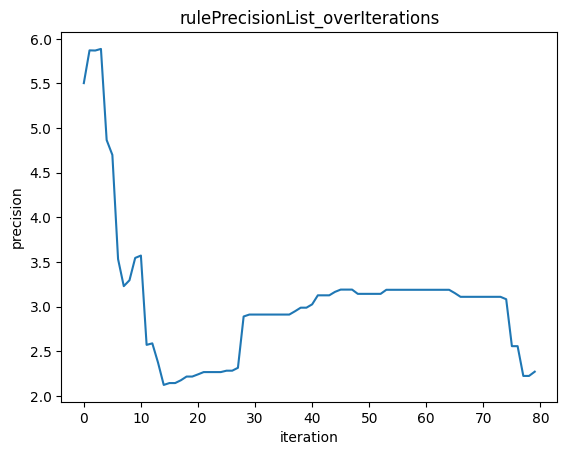

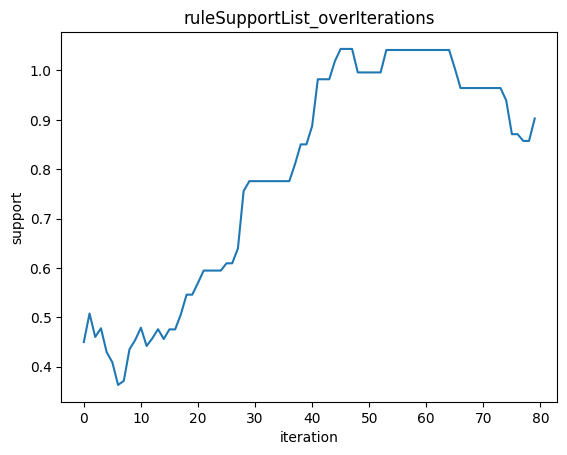

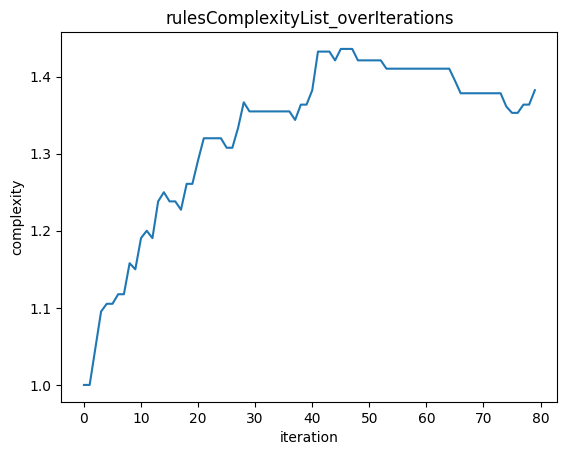

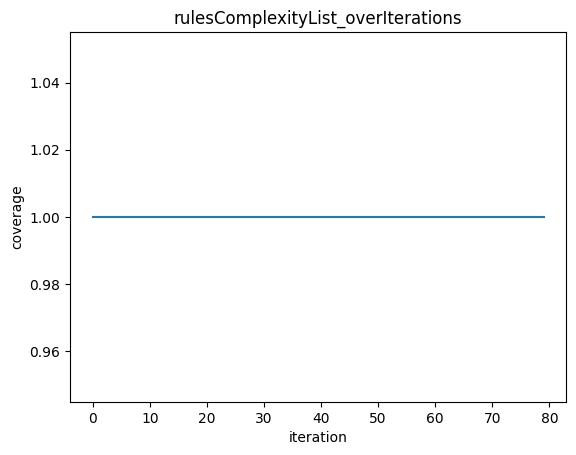

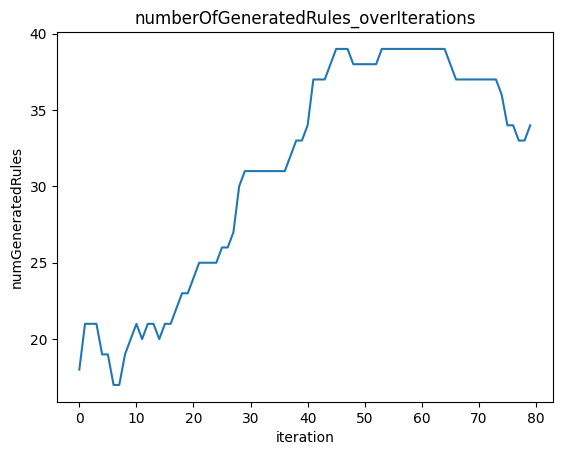

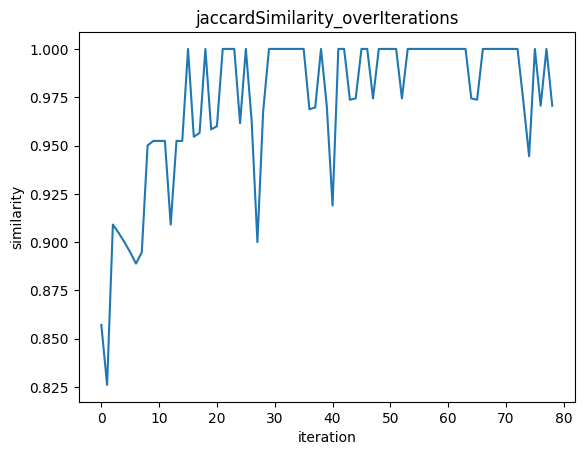

In [ ]:
import pickle

#plot
pathToDiscriminative_rules = "/home/rosario/explainable/test/Bachelor/rulesResults/discriminative_rules/"
pathToCharachteristic_rules = "/home/rosario/explainable/test/Bachelor/rulesResults/charachteristic_rules"
resultPaths_dicriminative_rules = os.listdir(pathToDiscriminative_rules)
resultPaths_charachteristic_rules = os.listdir(pathToCharachteristic_rules)

print(resultPaths_dicriminative_rules)
resultPaths_dicriminative_rules= np.sort(resultPaths_dicriminative_rules)
print(resultPaths_dicriminative_rules[-1])

mostRecentResultPaths_discriminative = pathToDiscriminative_rules + (resultPaths_dicriminative_rules[-1])
print(mostRecentResultPaths_discriminative)

#/home/rosario/explainable/test/Bachelor/rulesResults/discriminative_rules/_2023-06-07 12:18:40.npz

data = utils.loadData(mostRecentResultPaths_discriminative)
#print(data["rulePrecisionList_overIterations"])
#rules_list_overIterations
#labelList_rules_overIterations
#rulePrecisionList_overIterations
#predictionComparisonList_overIterations
#rulesComplexityList_overIterations                  )

pathToRulesResults = "/home/rosario/explainable/test/Bachelor/rulesResults/"

#plt.show()
fig1, axs1 = plt.subplots(nrows=1, ncols=1)


axs1.plot(calculate_mean_of_lists(data["rulePrecisionList_overIterations"]))
axs1.set_title("rulePrecisionList_overIterations")
axs1.set_xlabel("iteration")
axs1.set_ylabel("precision")

#pickle_file_path = str(pathToRulesResults) + "ruleSupportList_overIterations"
fig1.savefig(str(pathToRulesResults) + "rulePrecisionList_overIterations")    
pickle.dump(fig1, open(pathToRulesResults + "rulePrecisionList_overIterations", 'wb'))
fig1.show()

fig2, axs2 = plt.subplots(nrows=1, ncols=1)

axs2.plot(calculate_mean_of_lists(data["ruleSupportList_overIterations"]))
#pickle_file_path = str(pathToRulesResults) + "ruleSupportList_overIterations"
axs2.set_title("ruleSupportList_overIterations")
axs2.set_xlabel("iteration")
axs2.set_ylabel("support")

fig2.savefig(str(pathToRulesResults) + "ruleSupportList_overIterations")    
pickle.dump(fig2, open(pathToRulesResults + "ruleSupportList_overIterations", 'wb'))
fig2.show()

fig3, axs3 = plt.subplots(nrows=1, ncols=1)

axs3.plot(calculate_mean_of_lists(data["rulesComplexityList_overIterations"]))
axs3.set_title("rulesComplexityList_overIterations")
axs3.set_xlabel("iteration")
axs3.set_ylabel("complexity")

fig3.savefig(str(pathToRulesResults) + "rulesComplexityList_overIterations")    
pickle.dump(fig3, open(pathToRulesResults + "rulesComplexityList_overIterations", 'wb'))
fig3.show()

fig4, axs4 = plt.subplots(nrows=1, ncols=1)


axs4.plot(data["coverageList_overIterations"])
axs4.set_title("rulesComplexityList_overIterations")
axs4.set_xlabel("iteration")
axs4.set_ylabel("coverage")


fig4.savefig(str(pathToRulesResults) + "coverageList_overIterations")    
pickle.dump(fig4, open(pathToRulesResults + "coverageList_overIterations", 'wb'))
fig4.show()


fig5, axs5 = plt.subplots(nrows=1, ncols=1)
axs5.plot(data["numberOfGeneratedRules_overIterations"])
axs5.set_title("numberOfGeneratedRules_overIterations")
axs5.set_xlabel("iteration")
axs5.set_ylabel("numGeneratedRules")

fig5.savefig(str(pathToRulesResults) + "numberOfGeneratedRules_overIterations")    
pickle.dump(fig5, open(pathToRulesResults + "numberOfGeneratedRules_overIterations", 'wb'))
fig5.show()

fig6, axs6 = plt.subplots(nrows=1, ncols=1)


axs6.plot(data["jaccardSimilarity_overIterations"])
fig6.savefig(str(pathToRulesResults) + "jaccardSimilarity_overIterations") 
axs6.set_title("jaccardSimilarity_overIterations")
axs6.set_xlabel("iteration")
axs6.set_ylabel("similarity")

pickle.dump(fig6, open(pathToRulesResults + "jaccardSimilarity_overIterations", 'wb'))

fig6.show()

In [ ]:
#charachteristic_rules = cega_utils.getCharasteristicRules(pos_rules, pos_label, neg_rules,neg_label )
#charachteristic_rules



In [ ]:
#featureDict= {'Pregnancies':0, 'Glucose':1, 'BloodPressure':2, 'SkinThickness':3, 'Insulin':4,
#                                        'BMI':5, 'DiabetesPedigreeFunction':6, 'Age':7}
#rulesResultDataPath = dirPath + "rulesResultData/" 

#resultName = "charachteristic_rules"

#rules_list, labelList_rules, rulePrecisionList, predictionComparisonList, rulesComplexityList , coverageList,  ruleSupportList,  = numberOfGeneratedRules,  =cega_utils.calculateRulesMetrics(charachteristic_rules, resultName ,featureDict, testloader, trainedModelPrediction_Test, rulesResultDataPath, debug=True )

In [ ]:
#grads
grads1 = data["testGradientsPerSamplePerFeature_iteration"]
grads2 = data["testGradientsPerFeature_iteration"]
grads3 = data["testGradientsPerSamplePerFeature"]
grads4 = data["testGradientsPerFeature"]



#print(grads)

KeyError: 'testGradientsPerSamplePerFeature_iteration is not a file in the archive'

In [ ]:
import numpy as np
gradsOLDTRAIN = grads
#print(np.shape(grads) ) #epochs, num samples , features
print(np.shape(grads1) )# trainingsIterationen (Epochen* iteratipnProEpoche) , numsamples , numfeatures  
print(np.shape(grads2) ) # gradients unpacked for each iteration [grads1 unpacked] # 
print(np.shape(grads3) ) # trainingsEpochen , numsamples , numfeatures
print(np.shape(grads4) ) #gradients unpacked for each Epoch 
print()

for i in grads1:
    print(np.shape(i))



(40, 154, 8)
(8, 6160)
(2, 154, 8)
(8, 308)

(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)


In [ ]:
grads =  grads1
print(np.shape(grads))

(40, 154, 8)


In [ ]:
import numpy as np
#print(grads)
#for i in grads:
#    print(np.shape(i))
#oldGrads = grads
#grads = grads[299:300]
##grads_forEachSample = np.concatenate(grads, axis=0).reshape(-1, 8)
#print(np.shape(grads_forEachSample))

print(np.shape(grads))
print(np.shape(grads[0]))
print(grads[0]) #epochs , # sampleSize , #batchsize , #input_featuresize

#print(int(len(grads_forEachSample)/ batch_size))
#grads_forEachSample.reshape(int(len(grads_forEachSample)/ batch_size) , batch_size)

(40, 154, 8)
(154, 8)
[[-9.3162380e-04 -3.2841815e-03 -8.3877334e-05 ...  2.4605729e-03
   1.9583183e-03  5.8975205e-04]
 [ 5.4750271e-04 -1.1041617e-03  6.8767171e-04 ...  4.5737787e-03
   4.4620959e-03  1.8397891e-03]
 [ 1.1752852e-03 -2.5347152e-03  3.9854078e-04 ...  5.2994373e-03
   4.0180185e-03  6.9511111e-04]
 ...
 [ 8.4036012e-04 -1.6429188e-03  4.9080094e-04 ...  4.8838374e-03
   5.2968962e-03  2.7640860e-03]
 [ 3.8396640e-04 -2.8041452e-03 -6.5994798e-04 ...  3.9295400e-03
   5.2804509e-03  2.3647344e-03]
 [ 1.6338422e-03 -2.0254145e-03 -1.2722553e-03 ...  5.1425421e-03
   4.1813711e-03  3.8768095e-03]]


In [ ]:
from multiprocessing import Pool, cpu_count, Queue
from helper_func import *
import pandas as pd

X_test_DF = pd.DataFrame(X_test, columns=featureNames)
num_cores = cpu_count()
print(f'num of cores: {num_cores}')
#print(X_train)
if len(intervals_dict) == 0:
        compute_intervals(intervals_dict, X_test_DF)

#print(intervals_dict)
X_test_DF

num of cores: 12


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.928856,1.469709,0.316910,-0.575579,1.451115,-0.575579,-1.046981,-0.110741
1,-0.603717,2.267948,0.525804,-0.622862,-0.622862,-0.123192,-0.619435,-0.201684
2,-0.698853,2.093766,0.765239,-0.129484,-0.861530,-0.183710,-0.855945,-0.129484
3,-0.951097,0.962289,1.655067,-0.126362,-1.050066,0.084771,-1.042049,0.467448
4,-0.910719,0.920288,0.315260,-0.464909,1.939283,-0.351864,-0.918744,-0.528596
...,...,...,...,...,...,...,...,...
149,-0.958410,1.900715,0.701727,-0.558748,0.517267,-0.315876,-1.127591,-0.159085
150,-1.001330,1.212592,0.244001,-0.289713,1.706771,-0.307503,-1.057667,-0.507151
151,-0.584841,2.212725,0.503101,-0.709177,-0.709177,0.035286,-0.707048,-0.040870
152,-0.601401,1.893327,0.864966,-0.696620,-0.696620,-0.696620,-0.684432,0.617398


In [ ]:
from tqdm import tqdm
import pickle
import os
#import shutil

pred = model.predict(X_test.to("cuda:0"))

#print(pred)
#print(clf.predict_proba)
#print(pred)
pos_label = '1'
neg_label = '0'

itemset = set()
encoded_vals = []
#summed_values = {}
#num_features = X_train.shape[1]

shap_threshold = 0.001

p = Pool(num_cores)

for feature in X_test_DF.columns.to_list(): # for NLP this must be the whole vocab 
    if feature in intervals_dict:
        intervals = intervals_dict[feature]
        for interval in intervals:
            if interval != interval: continue
            left = interval.left
            right = interval.right
            name = f'{left}<{feature}<={right}'
            itemset.add(name)
    else:
        itemset.add(feature)

itemset.add(pos_label)
itemset.add(neg_label)

#for batch in tqdm(grads):
#    for sample in batch:
#ohe_dfList = [] 

def CEGA(epoch): 
    #print(np.shape(epoch))
    for indx in range(len(epoch)):#for indx in range(len(pred)):
        pos_queue.put(pos_label)
        neg_queue.put(neg_label)
        exp = epoch[indx]#[item[indx] for item in sample] #normalize featureListALL ?
        #print("exp")
        #print(np.shape(exp))
        #print(exp)
        
        instance_features = X_test_DF.iloc[[indx]].to_dict(orient='records')[0]
        feature_vals = [instance_features[name] for name in featureNames] #put here grads# feature values ?? 

        # GRADS AS LOCAL EXPLAINATION #
        # 
        #print("eh")

        zipped = zip(exp, feature_vals,
                     featureNames, [shap_threshold]*len(featureNames))


        p.map(get_relevant_features, zipped)
        append_to_encoded_vals(pos_queue, itemset, encoded_vals)
        append_to_encoded_vals(neg_queue, itemset, encoded_vals)

        ohe_df = pd.DataFrame(encoded_vals)
        #print(ohe_df)
        #exit()
    return ohe_df #ohe_dfList.append(ohe_df)


output_directory = './DEBUG/OHEresults/'
output_base_filename = 'ohe@Iteration'
counter = 0

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)


for i in tqdm (range(len(grads))):

    epoch  = grads[i]
    output_filename = f'{output_directory}{output_base_filename}_{counter}.pkl'
    try:
        with open(output_filename, 'xb') as f:
            ohe_df = CEGA(epoch)
            pickle.dump(ohe_df, f)
            counter += 1
    except FileExistsError:
        # If the file already exists, increment the counter and try again
        counter += 1
# TAKES ~30 sec for 154 samples  


100%|██████████| 40/40 [04:05<00:00,  6.13s/it]


In [ ]:
import pickle
path  = "./OHEresults/ohe@Iteration_0.pkl"
with open(path, 'rb') as f:
    ohe_df =  pickle.load(f)

ohe_df

#ohe_dfList[0]


,-1.074<DiabetesPedigreeFunction<=-0.864,-0.583<BMI<=-0.292,-0.292<BMI<=-0.00171,-0.942<Glucose<=-0.271,1.731<Glucose<=2.399,0.14<Age<=0.396,-0.398<Insulin<=0.297,0,-1.493<DiabetesPedigreeFunction<=-1.283,-0.778<Pregnancies<=-0.583,...,1.429<BloodPressure<=1.943,-0.543<SkinThickness<=-0.249,-0.655<DiabetesPedigreeFunction<=-0.445,-0.627<BloodPressure<=-0.111,0.396<Glucose<=1.064,-0.864<DiabetesPedigreeFunction<=-0.655,1.064<Glucose<=1.731,-0.111<BloodPressure<=0.403,0.992<Insulin<=1.687,1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
1,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
304,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
305,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
306,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
ohe_df

,-1.074<DiabetesPedigreeFunction<=-0.864,-0.583<BMI<=-0.292,-0.292<BMI<=-0.00171,-0.942<Glucose<=-0.271,1.731<Glucose<=2.399,0.14<Age<=0.396,-0.398<Insulin<=0.297,0,-1.493<DiabetesPedigreeFunction<=-1.283,-0.778<Pregnancies<=-0.583,...,1.429<BloodPressure<=1.943,-0.543<SkinThickness<=-0.249,-0.655<DiabetesPedigreeFunction<=-0.445,-0.627<BloodPressure<=-0.111,0.396<Glucose<=1.064,-0.864<DiabetesPedigreeFunction<=-0.655,1.064<Glucose<=1.731,-0.111<BloodPressure<=0.403,0.992<Insulin<=1.687,1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
1,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
304,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
305,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
306,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
                                        # 10/ len(pred)
freq_items = apriori(ohe_df, min_support=(1/len(pred)), use_colnames=True, max_len=3)
#print(len(freq_items))
#print(freq_items)
all_rules = association_rules(freq_items, metric="confidence", min_threshold=0.02, support_only=False) # 0.7 support_only=False
#print(len(all_rules))
#print(all_rules)                                                   # 10/ len(pred)
freq_items = apriori(ohe_df.loc[ohe_df[pos_label] == 1], min_support=(1/len(pred)), use_colnames=True, max_len=10) # max len 3
pos_rules = association_rules(freq_items, metric="confidence", min_threshold=0.02, support_only=False) # 0.6 support_only=False
                                                                    # 10/ len(pred)
freq_items = apriori(ohe_df.loc[ohe_df[neg_label] == 1], min_support=(1/len(pred)), use_colnames=True, max_len=10) # max len 3 
neg_rules = association_rules(freq_items, metric="confidence", min_threshold=0.02, support_only=False) # 0.6 support_only=False
pos_rules

/home/rosario/.local/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/home/rosario/.local/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/home/rosario/.local/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                                         antecedents   
0                                  (0.14<Age<=0.396)  \
1                             (1.731<Glucose<=2.399)   
2                                  (0.289<BMI<=0.58)   
3                                 (-0.116<Age<=0.14)   
4                             (1.731<Glucose<=2.399)   
..                                               ...   
924  (-0.627<BloodPressure<=-0.111, 0.14<Age<=0.396)   
925                             (1, 0.14<Age<=0.396)   
926                                (0.289<BMI<=0.58)   
927                   (-0.627<BloodPressure<=-0.111)   
928                                (0.14<Age<=0.396)   

                                           consequents  antecedent support   
0                               (1.731<Glucose<=2.399)            0.064935  \
1                                    (0.14<Age<=0.396)            0.474026   
2                               (1.731<Glucose<=2.399)            0.006494   
3              

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0.14<Age<=0.396),(1.731<Glucose<=2.399),0.064935,0.474026,0.051948,0.800000,1.687671,0.021167,2.629870
1,(1.731<Glucose<=2.399),(0.14<Age<=0.396),0.474026,0.064935,0.051948,0.109589,1.687671,0.021167,1.050150
2,(0.289<BMI<=0.58),(1.731<Glucose<=2.399),0.006494,0.474026,0.006494,1.000000,2.109589,0.003415,inf
3,(-0.116<Age<=0.14),(1.731<Glucose<=2.399),0.077922,0.474026,0.058442,0.750000,1.582192,0.021504,2.103896
4,(1.731<Glucose<=2.399),(-0.116<Age<=0.14),0.474026,0.077922,0.058442,0.123288,1.582192,0.021504,1.051745
...,...,...,...,...,...,...,...,...,...
924,"(-0.627<BloodPressure<=-0.111, 0.14<Age<=0.396)","(0.289<BMI<=0.58, 1, 1.731<Glucose<=2.399)",0.025974,0.006494,0.006494,0.250000,38.500000,0.006325,1.324675
925,"(1, 0.14<Age<=0.396)","(0.289<BMI<=0.58, -0.627<BloodPressure<=-0.111...",0.064935,0.006494,0.006494,0.100000,15.400000,0.006072,1.103896
926,(0.289<BMI<=0.58),"(-0.627<BloodPressure<=-0.111, 0.14<Age<=0.396...",0.006494,0.025974,0.006494,1.000000,38.500000,0.006325,inf
927,(-0.627<BloodPressure<=-0.111),"(0.289<BMI<=0.58, 0.14<Age<=0.396, 1, 1.731<Gl...",0.084416,0.006494,0.006494,0.076923,11.846154,0.005945,1.076299


In [ ]:
positive = all_rules[all_rules['consequents'] == {pos_label}]
positive = positive[positive['confidence'] >= 0.1] # confidence == 1
positive = positive.sort_values(['confidence', 'support'], ascending=[False, False])

seen = set()
dropped = set()
indexes_to_drop = []

positive = positive.reset_index(drop=True)
for i in positive.index:
    new_rule = positive.loc[[i]]['antecedents'].values[0]
    
    for seen_rule in seen:
        if seen_rule.issubset(new_rule):#new_rule.issubset(seen_rule) or seen_rule.issubset(new_rule):
            indexes_to_drop.append(i)
            break
    else:
        seen.add(new_rule)

positive.drop(positive.index[indexes_to_drop], inplace=True )
positive

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1.731<Glucose<=2.399),(1),0.237013,0.5,0.237013,1.000000,2.000000,0.118506,inf
1,(0.403<BloodPressure<=0.916),(1),0.198052,0.5,0.198052,1.000000,2.000000,0.099026,inf
2,(1.064<Glucose<=1.731),(1),0.172078,0.5,0.172078,1.000000,2.000000,0.086039,inf
4,(-0.111<BloodPressure<=0.403),(1),0.126623,0.5,0.126623,1.000000,2.000000,0.063312,inf
5,(0.916<BloodPressure<=1.429),(1),0.116883,0.5,0.116883,1.000000,2.000000,0.058442,inf
12,"(1.687<Insulin<=2.381, 0.396<Glucose<=1.064)",(1),0.045455,0.5,0.045455,1.000000,2.000000,0.022727,inf
13,(-0.627<BloodPressure<=-0.111),(1),0.042208,0.5,0.042208,1.000000,2.000000,0.021104,inf
14,(0.14<Age<=0.396),(1),0.032468,0.5,0.032468,1.000000,2.000000,0.016234,inf
16,(0.396<Age<=0.653),(1),0.025974,0.5,0.025974,1.000000,2.000000,0.012987,inf
21,(1.429<BloodPressure<=1.943),(1),0.016234,0.5,0.016234,1.000000,2.000000,0.008117,inf


In [ ]:
negative = all_rules[all_rules['consequents'] == {neg_label}]
negative = negative[negative['confidence'] >= 0.1] # confidence == 1

negative = negative.sort_values(['confidence', 'support'], ascending=[False, False])

seen = set()
dropped = set()
indexes_to_drop = []

negative = negative.reset_index(drop=True)
for i in negative.index:
    new_rule = negative.loc[[i]]['antecedents'].values[0]
    
    for seen_rule in seen:
        if seen_rule.issubset(new_rule):#new_rule.issubset(seen_rule) or seen_rule.issubset(new_rule):
            indexes_to_drop.append(i)
            break
    else:
        seen.add(new_rule)

negative.drop(negative.index[indexes_to_drop], inplace=True )
negative

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(-1.097<Insulin<=-0.398),(0),0.233766,0.5,0.233766,1.000000,2.000000,0.116883,inf
1,(-0.583<BMI<=-0.292),(0),0.220779,0.5,0.220779,1.000000,2.000000,0.110390,inf
2,(-1.074<DiabetesPedigreeFunction<=-0.864),(0),0.211039,0.5,0.211039,1.000000,2.000000,0.105519,inf
3,(-0.839<SkinThickness<=-0.543),(0),0.185065,0.5,0.185065,1.000000,2.000000,0.092532,inf
4,(-0.629<Age<=-0.372),(0),0.181818,0.5,0.181818,1.000000,2.000000,0.090909,inf
5,(-0.972<Pregnancies<=-0.778),(0),0.178571,0.5,0.178571,1.000000,2.000000,0.089286,inf
6,(-0.543<SkinThickness<=-0.249),(0),0.175325,0.5,0.175325,1.000000,2.000000,0.087662,inf
7,(-0.778<Pregnancies<=-0.583),(0),0.172078,0.5,0.172078,1.000000,2.000000,0.086039,inf
8,(-0.864<DiabetesPedigreeFunction<=-0.655),(0),0.165584,0.5,0.165584,1.000000,2.000000,0.082792,inf
9,(-0.292<BMI<=-0.00171),(0),0.162338,0.5,0.162338,1.000000,2.000000,0.081169,inf


In [ ]:
positive['num-items'] = positive['antecedents'].map(lambda x: len(x))
negative['num-items'] = negative['antecedents'].map(lambda x: len(x))
positive['consequents'] = positive['consequents'].map(lambda x: pos_label)
negative['consequents'] = negative['consequents'].map(lambda x: neg_label)

both = pd.concat([positive, negative], ignore_index=True)

#both = positive.append(negative, ignore_index=True)

discr_rules = both[['antecedents', 'consequents', 'num-items', 'support', 'confidence', 'antecedent support']].sort_values(
    ['support', 'confidence', 'num-items'], ascending=[False, False, False])

discr_rules = discr_rules.rename(columns={"antecedents": "itemset", "consequents": "label"})

discr_rules

,itemset,label,num-items,support,confidence,antecedent support
0,(1.731<Glucose<=2.399),1,1,0.237013,1.000000,0.237013
16,(-1.097<Insulin<=-0.398),0,1,0.233766,1.000000,0.233766
17,(-0.583<BMI<=-0.292),0,1,0.220779,1.000000,0.220779
18,(-1.074<DiabetesPedigreeFunction<=-0.864),0,1,0.211039,1.000000,0.211039
1,(0.403<BloodPressure<=0.916),1,1,0.198052,1.000000,0.198052
19,(-0.839<SkinThickness<=-0.543),0,1,0.185065,1.000000,0.185065
20,(-0.629<Age<=-0.372),0,1,0.181818,1.000000,0.181818
21,(-0.972<Pregnancies<=-0.778),0,1,0.178571,1.000000,0.178571
22,(-0.543<SkinThickness<=-0.249),0,1,0.175325,1.000000,0.175325
2,(1.064<Glucose<=1.731),1,1,0.172078,1.000000,0.172078


In [ ]:
rev_positive = pos_rules[pos_rules['antecedents'] == {pos_label}]
#rev_positive = pos_rules[pos_rules['consequents'] == {pos_label}] 
rev_positive = rev_positive[rev_positive['confidence'] >= 0.7]
rev_positive = rev_positive.sort_values(['confidence', 'support'], ascending=[False, False])

seen = set()
dropped = set()
indexes_to_drop = []

rev_positive = rev_positive.reset_index(drop=True)
for i in rev_positive.index:
    new_rule = rev_positive.loc[[i]]['consequents'].values[0]
    
    for seen_rule, indx in seen:
        if seen_rule.issubset(new_rule):
            indexes_to_drop.append(i)
            break
    else:
        seen.add((new_rule, i))

rev_positive.drop(rev_positive.index[indexes_to_drop], inplace=True )



rev_negative = neg_rules[neg_rules['antecedents'] == {neg_label}]
#rev_negative = neg_rules[neg_rules['consequents'] == {neg_label}]
rev_negative = rev_negative[rev_negative['confidence'] >= 0.7]
rev_negative = rev_negative.sort_values(['confidence', 'support'], ascending=[False, False])

seen = set()
dropped = set()
indexes_to_drop = []

rev_negative = rev_negative.reset_index(drop=True)
for i in rev_negative.index:
    new_rule = rev_negative.loc[[i]]['consequents'].values[0]
    
    for seen_rule, indx in seen:
        if seen_rule.issubset(new_rule):
            indexes_to_drop.append(i)
            break
    else:
        seen.add((new_rule, i))

rev_negative.drop(rev_negative.index[indexes_to_drop], inplace=True )


In [ ]:
rev_positive['num-items'] = rev_positive['consequents'].map(lambda x: len(x))
rev_negative['num-items'] = rev_negative['consequents'].map(lambda x: len(x))
rev_positive['antecedents'] = rev_positive['antecedents'].map(lambda x: pos_label)
rev_negative['antecedents'] = rev_negative['antecedents'].map(lambda x: neg_label)

#rev_both = rev_positive.append(rev_negative, ignore_index=True)
rev_both = pd.concat([rev_positive, rev_negative], ignore_index=True)

chr_rules = rev_both[['antecedents', 'consequents', 'num-items', 'support', 
                          'confidence', 'consequent support']].sort_values(
    ['support', 'confidence', 'num-items'], ascending=[False, False, False])

chr_rules = chr_rules.rename(columns={"antecedents": "label", "consequents": "itemset"})

chr_rules

,label,itemset,num-items,support,confidence,consequent support


In [ ]:
"""
from rules_model import *

dev_pred = model.predict(X_test.to("cuda:0"))
rules_model = RulesModel(ohe_df, discr_rules, X_test_DF, pos_label, neg_label)

test_pred = model.predict(X_train.to("cuda:0"))
rules_test_sol = rules_model.eval_rules(X_test_DF, test_pred, alpha=10, beta =1, decision_thr=0.97)
"""

'\nfrom rules_model import *\n\ndev_pred = model.predict(X_test.to("cuda:0"))\nrules_model = RulesModel(ohe_df, discr_rules, X_test_DF, pos_label, neg_label)\n\ntest_pred = model.predict(X_train.to("cuda:0"))\nrules_test_sol = rules_model.eval_rules(X_test_DF, test_pred, alpha=10, beta =1, decision_thr=0.97)\n'

In [ ]:
"""
rules_model = RulesModel(ohe_df, chr_rules, X_test_DF, pos_label, neg_label)

test_pred = model.predict(X_test)
print(type(test_pred))
print(type(X_test))
rules_test_sol = rules_model.eval_rules(X_test, test_pred, alpha=30, beta=1, decision_thr=0.041)
"""

'\nrules_model = RulesModel(ohe_df, chr_rules, X_test_DF, pos_label, neg_label)\n\ntest_pred = model.predict(X_test)\nprint(type(test_pred))\nprint(type(X_test))\nrules_test_sol = rules_model.eval_rules(X_test, test_pred, alpha=30, beta=1, decision_thr=0.041)\n'

In [ ]:
#import eval

#model.load_state_dict("/home/rosario/explainable/Bachelor/Models/finalModel")

In [ ]:
discr_rules
discr_rules1 =  discr_rules.loc[5:6]
discr_rules1

,itemset,label,num-items,support,confidence,antecedent support
5,"(1.687<Insulin<=2.381, 0.396<Glucose<=1.064)",1,2,0.045455,1.0,0.045455
6,(-0.627<BloodPressure<=-0.111),1,1,0.042208,1.0,0.042208


In [ ]:
import re
featureDict= {'Pregnancies':0, 'Glucose':1, 'BloodPressure':2, 'SkinThickness':3, 'Insulin':4,
       'BMI':5, 'DiabetesPedigreeFunction':6, 'Age':7}

rulesList =discr_rules["itemset"].to_list()
rulesList = [set(frozenset) for frozenset in rulesList]

labelList_rules = discr_rules["label"].apply(lambda x: ', '.join(list(x))).astype("unicode")
labelList_rules = [set(frozenset).pop() for frozenset in labelList_rules]

# Regular expression pattern
pattern = r"([+-]?\d+\.\d+)(<\w+<=)([+-]?\d+\.\d+)"

#bounds = re.findall(r"([+-]?\d+\.\d+)([<=>])([+-]?\d+\.\d+)", set_item)  # Extract bounds and category


# Filter out upper bound, lower bound, and category for each set
filtered_list = []
for set_item in rulesList:
    set_filtered = []
    for item in set_item:
        matches = re.findall(pattern, item)
        if matches:
            lower_bound, feature, upper_bound = matches[0]
            set_filtered.append((lower_bound, feature[1:-2], upper_bound))
    filtered_list.append(set_filtered)

print(filtered_list)

# meeeheeesrse
X_testList = []
y_testList = [] 
#print(testData[1])
for inputs, lables in testloader:
    X_testList.extend(inputs)
    y_testList.extend(lables)

pred = model.predict(X_test.to("cuda:0"))

def applyRulesOnData(data,predictions, rules, rulesLables, featureDict):
    """
    data: List
    predictions: List
    rules : List 
    rulesLables : List

    """
    predictionList = []  
    
    for j in range(len(data)):
        tempPredictionList = []  
        rulesComplexityList = []
        for i in range(len(rules)): 
            # for all rules per sample # num samples * num rules
                                            # only works for one 
            #print(filtered_list[i][0])

            conditionsAreMet = False
            rulesComplexityList.append(len(rules[i]))
            for k in range(len(rules[i])):
                #print("K:")
                #print(k)
                
                
                lowerBound, feature, upperBound = rules[i][k]
                #print(feature)
                #print()
                #print(X_testList[i][featureDict[feature]])
                if float(lowerBound) < data[j][featureDict[feature]] <= float(upperBound):
                    conditionsAreMet = True
                    # Rule is apicable

                else:
                    # rules is not aplicable      
                    tempPredictionList.append(-1)
                    conditionsAreMet = False
                    break
            #print("k END")  
            if conditionsAreMet == True:
                if predictions[j] ==  int(rulesLables[i]):
                    # explaination model prediction is the same as trained Model prediction
                    tempPredictionList.append(1)
                elif predictions[j] != int(rulesLables[i]):
                    # explaination model prediction not the same as trained Model prediction
                    tempPredictionList.append(0)

        predictionList.append(tempPredictionList)
    return predictionList, rulesComplexityList

predictionList, rulesComplexityList = applyRulesOnData(X_testList,pred, filtered_list, labelList_rules, featureDict)
predictionList

def metricCalc(predictionList):
    
    isCoverdList = []
    correctPredictedList = [] 
    for i in predictionList:
        isCovered = False
        for j in i:
            if j == 0 or j ==1:
                isCovered = True
                isCoverdList.append(1) # wird von einer Rule abgedeckt
                break
        if not isCovered:
           isCoverdList.append(-1)
    return isCoverdList
isCoverdList = metricCalc(predictionList)

coverage = isCoverdList.count(1) /len(isCoverdList) # instances covered by global explanation set  


def rulePrecisionAndSupport(predictionList): 
    
    # recision of an applicable rule on test instances(precision)
    # AND how many instances does a rule cover (Support)
    
    predictionList_transposed =  np.array(predictionList).transpose()
    rulePrecisionList = [] 
    ruleSupportList = [] 
    for i in predictionList_transposed:
        tempCorrectClassified = list(i).count(1)
        tempFalseClassified =   list(i).count(0)
        #tempNotAplicable =     list(i).count(0) 

        try:
            rulePrecisionList.append(len(predictionList_transposed) / tempCorrectClassified)
        except ZeroDivisionError:
            #print("ZeroDivisionError")
            rulePrecisionList.append(0)
        try:
            ruleSupportList.append(len(predictionList_transposed)/ (tempCorrectClassified + tempFalseClassified))
        except ZeroDivisionError:
            #print("ZeroDivisionError")
            rulePrecisionList.append(0)
        
    
    return rulePrecisionList, ruleSupportList
rulePrecisionList, ruleSupportList = rulePrecisionAndSupport(predictionList)

generatedRules = (len(rulesList))

print(predictionList)
print(rulePrecisionList)
print(ruleSupportList)
print(coverage)
print(generatedRules)
print(rulesComplexityList)


[[('1.731', 'Glucose', '2.399')], [('-1.097', 'Insulin', '-0.398')], [('-0.583', 'BMI', '-0.292')], [('-1.074', 'DiabetesPedigreeFunction', '-0.864')], [('0.403', 'BloodPressure', '0.916')], [('-0.839', 'SkinThickness', '-0.543')], [('-0.629', 'Age', '-0.372')], [('-0.972', 'Pregnancies', '-0.778')], [('-0.543', 'SkinThickness', '-0.249')], [('1.064', 'Glucose', '1.731')], [('-0.778', 'Pregnancies', '-0.583')], [('-0.864', 'DiabetesPedigreeFunction', '-0.655')], [('-0.292', 'BMI', '-0.00171')], [('-0.111', 'BloodPressure', '0.403')], [('-0.372', 'Age', '-0.116')], [('0.916', 'BloodPressure', '1.429')], [('-0.249', 'SkinThickness', '0.0455')], [('-1.167', 'Pregnancies', '-0.972')], [('-0.00171', 'BMI', '0.289')], [('-1.283', 'DiabetesPedigreeFunction', '-1.074')], [('1.687', 'Insulin', '2.381')], [('0.396', 'Glucose', '1.064')], [('0.992', 'Insulin', '1.687')], [('0.297', 'Insulin', '0.992')], [('-0.116', 'Age', '0.14')], [('1.687', 'Insulin', '2.381'), ('0.396', 'Glucose', '1.064')], [